# Title: The Relationship between Job Openings (JOLTS) & The SPY500: How do Job Openings across Sectors influnce the SPY500?

In [1]:
import csv
import numpy as np
import pandas as pd
import os

from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation 
import seaborn as sns
%matplotlib inline



c:\Users\alvar\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


##### All files were downloaded from: https://fred.stlouisfed.org/

In [2]:
JOLTS_Government = pd.read_csv('./JOLTSGovernment.csv')
JOLTS_Government = JOLTS_Government.rename(columns={"JTS9000JOL": "JOLTS_Government"})

JOLTSInformation = pd.read_csv('./JOLTSInformation.csv')
JOLTSInformation = JOLTSInformation.rename(columns={"JTU5100JOL": "JOLTS_Information"})

JOLTSDurableGoodsManuf = pd.read_csv('./JOLTSDurableGoodsManuf.csv')
JOLTSDurableGoodsManuf = JOLTSDurableGoodsManuf.rename(columns={"JTS3200JOL": "JOLTSDurableGoodsManuf"})

JOLTSFinanceANDInsurance = pd.read_csv('./JOLTSFinanceANDInsurance.csv')
JOLTSFinanceANDInsurance = JOLTSFinanceANDInsurance.rename(columns={"JTU5200JOL": "JOLTSFinanceANDInsurance"})

JOLTSHealthCareSocialAssistance = pd.read_csv('./JOLTSHealthCareSocialAssistance.csv')
JOLTSHealthCareSocialAssistance = JOLTSHealthCareSocialAssistance.rename(columns={"JTS6200JOL": "JOLTSHealthCareSocialAssistance"})

JOLTSLeisureANDHospitality = pd.read_csv('./JOLTSLeisureANDHospitality.csv')
JOLTSLeisureANDHospitality = JOLTSLeisureANDHospitality.rename(columns={"JTS7000JOL": "JOLTSLeisureANDHospitality"})

JOLTSNondurableGoodsManuf = pd.read_csv('./JOLTSNondurableGoodsManuf.csv')
JOLTSNondurableGoodsManuf = JOLTSNondurableGoodsManuf.rename(columns={"JTS3400JOL": "JOLTSNondurableGoodsManuf"})

JOLTSPrivEducationHealthServices = pd.read_csv('./JOLTSPrivEducationHealthServices.csv')
JOLTSPrivEducationHealthServices = JOLTSPrivEducationHealthServices.rename(columns={"JTS6000JOL": "JOLTSPrivEduHealthServices"})

JOLTSProfessional_AND_BusinessServices = pd.read_csv('./JOLTSProfessional_AND_BusinessServices.csv')
JOLTSProfessional_AND_BusinessServices = JOLTSProfessional_AND_BusinessServices.rename(columns={"JTS540099JOL": "JOLTSProf_AND_Bus.Services"})

JOLTSRetailTrade = pd.read_csv('./JOLTSRetailTrade.csv')
JOLTSRetailTrade = JOLTSRetailTrade.rename(columns={"JTS4400JOL": "JOLTSRetailTrade"})

JOLTSTransportion_Warehousing_Utilities = pd.read_csv('./JOLTSTransportion_Warehousing_Utilities.csv')
JOLTSTransportion_Warehousing_Utilities = JOLTSTransportion_Warehousing_Utilities.rename(columns={"JTU480099JOL": "JOLTSTransp_Warehousing_Utlts"})

JTSJOL_TOTAL = pd.read_csv('./JTSJOL_TOTAL.csv')
JTSJOL_TOTAL = JTSJOL_TOTAL.rename(columns={"JTSJOL": "JTSJOL_TOTAL"})

UNEMPLOY = pd.read_csv('./UNEMPLOY.csv')
UNEMPLOY = UNEMPLOY.rename(columns={"UNEMPLOY": "UNEMPLOYED"})


In [3]:
# Merge all DataFrames connected above:
dfs = [
    JOLTS_Government, 
    JOLTSDurableGoodsManuf, 
    JOLTSInformation, 
    JOLTSFinanceANDInsurance, 
    JOLTSHealthCareSocialAssistance, 
    JOLTSLeisureANDHospitality, 
    JOLTSPrivEducationHealthServices, 
    JOLTSProfessional_AND_BusinessServices, 
    JOLTSRetailTrade,  
    JOLTSTransportion_Warehousing_Utilities, 
    JOLTSNondurableGoodsManuf, 
    JTSJOL_TOTAL, 
    UNEMPLOY
]

# Here we are an inner merge assuming "Date" is the common column in all dataframes.
# An inner merged was conducted because an outdoor merge included a few blanks.
JOLTS_SECTORS_combined_df = dfs[0]
for df in dfs[1:]:
    JOLTS_SECTORS_combined_df = pd.merge(JOLTS_SECTORS_combined_df, df, on='DATE', how='inner')  # Use inner join to keep only matching dates

# Filter for dates starting from 1/1/2000 onwards
# I am ensuring that all sectors start on the same date as soon might have started collecting data sooner. 
JOLTS_SECTORS_combined_df['DATE'] = pd.to_datetime(JOLTS_SECTORS_combined_df['DATE'])  # Convert Date column to datetime
JOLTS_SECTORS_combined_df = JOLTS_SECTORS_combined_df[JOLTS_SECTORS_combined_df['DATE'] >= '2000-01-01']  # Filter dates from 2000-01-01 onwards

# Inspect the combined dataframe
JOLTS_SECTORS_combined_df.head(2)

DATE      JOLTS_Government JOLTSDurableGoodsManuf  \
0 2001-01-01  468.6666666666666667   278.0000000000000000   
1 2001-04-01  502.3333333333333333   219.0000000000000000   

      JOLTS_Information JOLTSFinanceANDInsurance  \
0  179.3333333333333333     219.6666666666666667   
1  120.3333333333333333     205.6666666666666667   

  JOLTSHealthCareSocialAssistance JOLTSLeisureANDHospitality  \
0            771.0000000000000000       650.0000000000000000   
1            700.3333333333333333       518.6666666666666667   

  JOLTSPrivEduHealthServices JOLTSProf_AND_Bus.Services      JOLTSRetailTrade  \
0       822.6666666666666667       940.3333333333333333  516.6666666666666667   
1       761.6666666666666667       784.0000000000000000  483.6666666666666667   

  JOLTSTransp_Warehousing_Utlts JOLTSNondurableGoodsManuf  \
0          141.6666666666666667      155.6666666666666667   
1          126.0000000000000000      116.0000000000000000   

            JTSJOL_TOTAL             UNEMPLOYED  
0  5031.0000000000000000  6084.3333333333333333  
1  4467.0000000000000000  6327.0000000000000000

In [4]:
JOLTS_SECTORS_combined_df.columns
# Show the columns in order to use it to format the intergers below. 

Index(['DATE', 'JOLTS_Government', 'JOLTSDurableGoodsManuf',
       'JOLTS_Information', 'JOLTSFinanceANDInsurance',
       'JOLTSHealthCareSocialAssistance', 'JOLTSLeisureANDHospitality',
       'JOLTSPrivEduHealthServices', 'JOLTSProf_AND_Bus.Services',
       'JOLTSRetailTrade', 'JOLTSTransp_Warehousing_Utlts',
       'JOLTSNondurableGoodsManuf', 'JTSJOL_TOTAL', 'UNEMPLOYED'],
      dtype='object')

In [5]:
# A few of the rows included numbers that were reported in a format different decimal point from the other rows. 
columns_to_round = ['JOLTS_Government', 'JOLTSDurableGoodsManuf',
       'JOLTS_Information', 'JOLTSFinanceANDInsurance',
       'JOLTSHealthCareSocialAssistance', 'JOLTSLeisureANDHospitality',
       'JOLTSPrivEduHealthServices', 'JOLTSProf_AND_Bus.Services',
       'JOLTSRetailTrade', 'JOLTSTransp_Warehousing_Utlts',
       'JOLTSNondurableGoodsManuf', 'JTSJOL_TOTAL', 'UNEMPLOYED']

# Convert the specified columns to numeric
JOLTS_SECTORS_combined_df[columns_to_round] = JOLTS_SECTORS_combined_df[columns_to_round].apply(pd.to_numeric, errors='coerce')

# Round the specified columns to 1 decimal place
JOLTS_SECTORS_combined_df[columns_to_round] = JOLTS_SECTORS_combined_df[columns_to_round].round(1)
JOLTS_SECTORS_combined_df.head(3)

DATE  JOLTS_Government  JOLTSDurableGoodsManuf  JOLTS_Information  \
0 2001-01-01             468.7                   278.0              179.3   
1 2001-04-01             502.3                   219.0              120.3   
2 2001-07-01             476.7                   187.7              100.3   

   JOLTSFinanceANDInsurance  JOLTSHealthCareSocialAssistance  \
0                     219.7                            771.0   
1                     205.7                            700.3   
2                     204.7                            752.3   

   JOLTSLeisureANDHospitality  JOLTSPrivEduHealthServices  \
0                       650.0                       822.7   
1                       518.7                       761.7   
2                       557.3                       807.7   

   JOLTSProf_AND_Bus.Services  JOLTSRetailTrade  \
0                       940.3             516.7   
1                       784.0             483.7   
2                       664.7             380.0   

   JOLTSTransp_Warehousing_Utlts  JOLTSNondurableGoodsManuf  JTSJOL_TOTAL  \
0                          141.7                      155.7        5031.0   
1                          126.0                      116.0        4467.0   
2                          136.7                      116.3        4180.7   

   UNEMPLOYED  
0      6084.3  
1      6327.0  
2      6922.3

### CORRELATION: Matrix Correlation of all Sectors + Overall JOLT (JTSOL_TOTAL) + UNEMPLOYED
#### Resuls show that there a several significant relationships across the sectors.   

In [6]:
# Save to a new CSV file if needed
JOLTS_SECTORS_combined_df.to_csv('.\JOLTS_SECTORS_combined_df.csv', index=False)

In [7]:
# Calculate the correlation matrix for the specified columns
JOLTS_Sectors_correlation_matrix = JOLTS_SECTORS_combined_df[columns_to_round].corr()

# Display the correlation matrix
JOLTS_Sectors_correlation_matrix 


JOLTS_Government  JOLTSDurableGoodsManuf  \
JOLTS_Government                         1.000000                0.908440   
JOLTSDurableGoodsManuf                   0.908440                1.000000   
JOLTS_Information                        0.728974                0.873138   
JOLTSFinanceANDInsurance                 0.815482                0.845404   
JOLTSHealthCareSocialAssistance          0.976670                0.926647   
JOLTSLeisureANDHospitality               0.930962                0.957127   
JOLTSPrivEduHealthServices               0.977547                0.926510   
JOLTSProf_AND_Bus.Services               0.925365                0.945429   
JOLTSRetailTrade                         0.778203                0.826188   
JOLTSTransp_Warehousing_Utlts            0.959185                0.929580   
JOLTSNondurableGoodsManuf                0.885298                0.939335   
JTSJOL_TOTAL                             0.958944                0.960314   
UNEMPLOYED                              -0.446908               -0.519531   

                                 JOLTS_Information  JOLTSFinanceANDInsurance  \
JOLTS_Government                          0.728974                  0.815482   
JOLTSDurableGoodsManuf                    0.873138                  0.845404   
JOLTS_Information                         1.000000                  0.746805   
JOLTSFinanceANDInsurance                  0.746805                  1.000000   
JOLTSHealthCareSocialAssistance           0.752088                  0.861529   
JOLTSLeisureANDHospitality                0.812281                  0.882569   
JOLTSPrivEduHealthServices                0.750472                  0.862693   
JOLTSProf_AND_Bus.Services                0.814351                  0.858443   
JOLTSRetailTrade                          0.730009                  0.794269   
JOLTSTransp_Warehousing_Utlts             0.765684                  0.821177   
JOLTSNondurableGoodsManuf                 0.791866                  0.777860   
JTSJOL_TOTAL                              0.814465                  0.882619   
UNEMPLOYED                               -0.533243                 -0.609308   

                                 JOLTSHealthCareSocialAssistance  \
JOLTS_Government                                        0.976670   
JOLTSDurableGoodsManuf                                  0.926647   
JOLTS_Information                                       0.752088   
JOLTSFinanceANDInsurance                                0.861529   
JOLTSHealthCareSocialAssistance                         1.000000   
JOLTSLeisureANDHospitality                              0.959982   
JOLTSPrivEduHealthServices                              0.999642   
JOLTSProf_AND_Bus.Services                              0.955289   
JOLTSRetailTrade                                        0.818152   
JOLTSTransp_Warehousing_Utlts                           0.956294   
JOLTSNondurableGoodsManuf                               0.910198   
JTSJOL_TOTAL                                            0.980290   
UNEMPLOYED                                             -0.498084   

                                 JOLTSLeisureANDHospitality  \
JOLTS_Government                                   0.930962   
JOLTSDurableGoodsManuf                             0.957127   
JOLTS_Information                                  0.812281   
JOLTSFinanceANDInsurance                           0.882569   
JOLTSHealthCareSocialAssistance                    0.959982   
JOLTSLeisureANDHospitality                         1.000000   
JOLTSPrivEduHealthServices                         0.961256   
JOLTSProf_AND_Bus.Services                         0.977623   
JOLTSRetailTrade                                   0.900741   
JOLTSTransp_Warehousing_Utlts                      0.966185   
JOLTSNondurableGoodsManuf                          0.942821   
JTSJOL_TOTAL                                       0.991557   
UNEMPLOYED                                        -0.545852  

In [8]:
# Save to a new CSV file for future analysis
JOLTS_Sectors_correlation_matrix.to_csv('.\JOLTS_Sectors_correlation_matrix.csv', index=False)

###### Separating the JOLTS Total and UNEMPLOYED to have a better view of how they are influence with the sectors. 

In [9]:
# Find the correlations for JTSJOL_TOTAL and UNEMPLOYED
correlation_with_total_unemployed = JOLTS_Sectors_correlation_matrix[['JTSJOL_TOTAL', 'UNEMPLOYED']]

# Sort the correlations to see which sectors affect them the most
correlation_with_total_unemployed = correlation_with_total_unemployed.sort_values(by=['JTSJOL_TOTAL', 'UNEMPLOYED'], ascending=False)

# Display the correlation of sectors with JTSJOL_TOTAL and UNEMPLOYED
correlation_with_total_unemployed


JTSJOL_TOTAL  UNEMPLOYED
JTSJOL_TOTAL                         1.000000   -0.524165
JOLTSLeisureANDHospitality           0.991557   -0.545852
JOLTSProf_AND_Bus.Services           0.985743   -0.494620
JOLTSPrivEduHealthServices           0.981436   -0.495119
JOLTSHealthCareSocialAssistance      0.980290   -0.498084
JOLTSTransp_Warehousing_Utlts        0.976439   -0.426433
JOLTSDurableGoodsManuf               0.960314   -0.519531
JOLTS_Government                     0.958944   -0.446908
JOLTSNondurableGoodsManuf            0.947390   -0.439919
JOLTSRetailTrade                     0.892642   -0.488213
JOLTSFinanceANDInsurance             0.882619   -0.609308
JOLTS_Information                    0.814465   -0.533243
UNEMPLOYED                          -0.524165    1.000000

##### The code is analyzing the correlation between different sectors in the JOLTS dataset. It separates these correlations into three categories: strong positive correlations, no relationship, and negative correlations and sorts them strongest relationship. The results are then exported into separate CSV files for further analysis.

In [10]:
# The reason a function was created was because the initial time the correlation table was created it was too long due to duplicates. 
# I wanted to remove the duplicates from the table to make it short and easier to read. 
# Function to remove duplicate sector pairs (where Sector_1 and Sector_2 are reversed)
def remove_duplicates(df):
    df['Sector_Pair'] = df.apply(lambda x: tuple(sorted([x['Sector_1'], x['Sector_2']])), axis=1)
    df = df.drop_duplicates(subset='Sector_Pair').drop(columns='Sector_Pair')
    return df.reset_index(drop=True)

# Step 1: Check the structure of the correlation matrix
print("Correlation Matrix Shape: ", JOLTS_Sectors_correlation_matrix.shape)
print("Correlation Matrix Head:\n", JOLTS_Sectors_correlation_matrix.head())

Correlation Matrix Shape:  (13, 13)
Correlation Matrix Head:
                                  JOLTS_Government  JOLTSDurableGoodsManuf  \
JOLTS_Government                         1.000000                0.908440   
JOLTSDurableGoodsManuf                   0.908440                1.000000   
JOLTS_Information                        0.728974                0.873138   
JOLTSFinanceANDInsurance                 0.815482                0.845404   
JOLTSHealthCareSocialAssistance          0.976670                0.926647   

                                 JOLTS_Information  JOLTSFinanceANDInsurance  \
JOLTS_Government                          0.728974                  0.815482   
JOLTSDurableGoodsManuf                    0.873138                  0.845404   
JOLTS_Information                         1.000000                  0.746805   
JOLTSFinanceANDInsurance                  0.746805                  1.000000   
JOLTSHealthCareSocialAssistance           0.752088                  0.86152

In [11]:

# Filter correlations above 0.80
strong_positive_correlations = JOLTS_Sectors_correlation_matrix[JOLTS_Sectors_correlation_matrix > 0.80].stack().reset_index()
strong_positive_correlations.columns = ['Sector_1', 'Sector_2', 'Correlation']
strong_positive_correlations = strong_positive_correlations[strong_positive_correlations['Sector_1'] != strong_positive_correlations['Sector_2']]
strong_positive_correlations = remove_duplicates(strong_positive_correlations)

# Debugging: Check the result after removing duplicates
print("Strong Positive Correlations Shape: ", strong_positive_correlations.shape)
print("Strong Positive Correlations Head:\n", strong_positive_correlations.head())

Strong Positive Correlations Shape:  (56, 3)
Strong Positive Correlations Head:
            Sector_1                         Sector_2  Correlation
0  JOLTS_Government           JOLTSDurableGoodsManuf     0.908440
1  JOLTS_Government         JOLTSFinanceANDInsurance     0.815482
2  JOLTS_Government  JOLTSHealthCareSocialAssistance     0.976670
3  JOLTS_Government       JOLTSLeisureANDHospitality     0.930962
4  JOLTS_Government       JOLTSPrivEduHealthServices     0.977547


In [22]:
# Function to remove duplicate sector pairs (where Sector_1 and Sector_2 are reversed)
def remove_duplicates(df):
    if df.empty:
        print("DataFrame is empty. Skipping removal of duplicates.")
        return df  # Return as is if DataFrame is empty
    df['Sector_Pair'] = df.apply(lambda x: tuple(sorted([x['Sector_1'], x['Sector_2']])), axis=1)
    df = df.drop_duplicates(subset='Sector_Pair').drop(columns='Sector_Pair')
    return df.reset_index(drop=True)

# Filter correlations with no relationship (between -0.1 and 0.1)
no_relationship_correlations = JOLTS_Sectors_correlation_matrix[(JOLTS_Sectors_correlation_matrix > -0.1) & (JOLTS_Sectors_correlation_matrix < 0.1)].stack().reset_index()
no_relationship_correlations.columns = ['Sector_1', 'Sector_2', 'Correlation']

# Check for missing columns or empty DataFrame before proceeding
if no_relationship_correlations.empty:
    print("No relationship correlations DataFrame is empty.")
else:
    # Exclude self-correlations
    no_relationship_correlations = no_relationship_correlations[no_relationship_correlations['Sector_1'] != no_relationship_correlations['Sector_2']]

    # Check if columns are present before applying remove_duplicates
    if 'Sector_1' in no_relationship_correlations.columns and 'Sector_2' in no_relationship_correlations.columns:
        no_relationship_correlations = remove_duplicates(no_relationship_correlations)
    else:
        print("Expected columns are missing in no_relationship_correlations.")

# Debugging: Check the result after removing duplicates
print("No Relationship Correlations Shape: ", no_relationship_correlations.shape)
print("No Relationship Correlations Head:\n", no_relationship_correlations.head())


No relationship correlations DataFrame is empty.
No Relationship Correlations Shape:  (0, 3)
No Relationship Correlations Head:
 Empty DataFrame
Columns: [Sector_1, Sector_2, Correlation]
Index: []


In [23]:

# Filter negative correlations
negative_correlations = JOLTS_Sectors_correlation_matrix[JOLTS_Sectors_correlation_matrix < 0].stack().reset_index()
negative_correlations.columns = ['Sector_1', 'Sector_2', 'Correlation']
negative_correlations = remove_duplicates(negative_correlations)

# Debugging: Check the result after removing duplicates
print("Negative Correlations Shape: ", negative_correlations.shape)
print("Negative Correlations Head:\n", negative_correlations.head())

# Export each to a CSV file
strong_positive_correlations.to_csv('JOLTSSectors_strong_positive_correlations.csv', index=False)
no_relationship_correlations.to_csv('JOLTSSectors_no_relationship_correlations.csv', index=False)
negative_correlations.to_csv('JOLTSSectors_negative_correlations.csv', index=False)



Negative Correlations Shape:  (12, 3)
Negative Correlations Head:
                           Sector_1    Sector_2  Correlation
0                 JOLTS_Government  UNEMPLOYED    -0.446908
1           JOLTSDurableGoodsManuf  UNEMPLOYED    -0.519531
2                JOLTS_Information  UNEMPLOYED    -0.533243
3         JOLTSFinanceANDInsurance  UNEMPLOYED    -0.609308
4  JOLTSHealthCareSocialAssistance  UNEMPLOYED    -0.498084


In [25]:
# Sort strong positive correlations in descending order
strong_positive_correlations = strong_positive_correlations.sort_values(by='Correlation', ascending=False)

print("Strong Positive Correlations (Above 0.80):")
strong_positive_correlations

Strong Positive Correlations (Above 0.80):


Sector_1                         Sector_2  \
29  JOLTSHealthCareSocialAssistance       JOLTSPrivEduHealthServices   
40       JOLTSLeisureANDHospitality                     JTSJOL_TOTAL   
49       JOLTSProf_AND_Bus.Services                     JTSJOL_TOTAL   
45       JOLTSPrivEduHealthServices                     JTSJOL_TOTAL   
34  JOLTSHealthCareSocialAssistance                     JTSJOL_TOTAL   
36       JOLTSLeisureANDHospitality       JOLTSProf_AND_Bus.Services   
4                  JOLTS_Government       JOLTSPrivEduHealthServices   
2                  JOLTS_Government  JOLTSHealthCareSocialAssistance   
54    JOLTSTransp_Warehousing_Utlts                     JTSJOL_TOTAL   
38       JOLTSLeisureANDHospitality    JOLTSTransp_Warehousing_Utlts   
35       JOLTSLeisureANDHospitality       JOLTSPrivEduHealthServices   
18           JOLTSDurableGoodsManuf                     JTSJOL_TOTAL   
28  JOLTSHealthCareSocialAssistance       JOLTSLeisureANDHospitality   
6                  JOLTS_Government    JOLTSTransp_Warehousing_Utlts   
8                  JOLTS_Government                     JTSJOL_TOTAL   
43       JOLTSPrivEduHealthServices    JOLTSTransp_Warehousing_Utlts   
47       JOLTSProf_AND_Bus.Services    JOLTSTransp_Warehousing_Utlts   
12           JOLTSDurableGoodsManuf       JOLTSLeisureANDHospitality   
41       JOLTSPrivEduHealthServices       JOLTSProf_AND_Bus.Services   
32  JOLTSHealthCareSocialAssistance    JOLTSTransp_Warehousing_Utlts   
30  JOLTSHealthCareSocialAssistance       JOLTSProf_AND_Bus.Services   
55        JOLTSNondurableGoodsManuf                     JTSJOL_TOTAL   
14           JOLTSDurableGoodsManuf       JOLTSProf_AND_Bus.Services   
39       JOLTSLeisureANDHospitality        JOLTSNondurableGoodsManuf   
17           JOLTSDurableGoodsManuf        JOLTSNondurableGoodsManuf   
48       JOLTSProf_AND_Bus.Services        JOLTSNondurableGoodsManuf   
53    JOLTSTransp_Warehousing_Utlts        JOLTSNondurableGoodsManuf   
3                  JOLTS_Government       JOLTSLeisureANDHospitality   
16           JOLTSDurableGoodsManuf    JOLTSTransp_Warehousing_Utlts   
11           JOLTSDurableGoodsManuf  JOLTSHealthCareSocialAssistance   
13           JOLTSDurableGoodsManuf       JOLTSPrivEduHealthServices   
5                  JOLTS_Government       JOLTSProf_AND_Bus.Services   
44       JOLTSPrivEduHealthServices        JOLTSNondurableGoodsManuf   
33  JOLTSHealthCareSocialAssistance        JOLTSNondurableGoodsManuf   
0                  JOLTS_Government           JOLTSDurableGoodsManuf   
37       JOLTSLeisureANDHospitality                 JOLTSRetailTrade   
52                 JOLTSRetailTrade                     JTSJOL_TOTAL   
7                  JOLTS_Government        JOLTSNondurableGoodsManuf   
46       JOLTSProf_AND_Bus.Services                 JOLTSRetailTrade   
27         JOLTSFinanceANDInsurance                     JTSJOL_TOTAL   
23         JOLTSFinanceANDInsurance       JOLTSLeisureANDHospitality   
9            JOLTSDurableGoodsManuf                JOLTS_Information   
51                 JOLTSRetailTrade        JOLTSNondurableGoodsManuf   
50                 JOLTSRetailTrade    JOLTSTransp_Warehousing_Utlts   
24         JOLTSFinanceANDInsurance       JOLTSPrivEduHealthServices   
22         JOLTSFinanceANDInsurance  JOLTSHealthCareSocialAssistance   
25         JOLTSFinanceANDInsurance       JOLTSProf_AND_Bus.Services   
10           JOLTSDurableGoodsManuf         JOLTSFinanceANDInsurance   
15           JOLTSDurableGoodsManuf                 JOLTSRetailTrade   
26         JOLTSFinanceANDInsurance    JOLTSTransp_Warehousing_Utlts   
42       JOLTSPrivEduHealthServices                 JOLTSRetailTrade   
31  JOLTSHealthCareSocialAssistance                 JOLTSRetailTrade   
1                  JOLTS_Government         JOLTSFinanceANDInsurance   
21                JOLTS_Information                     JTSJOL_TOTAL   
20                JOLTS_Information       JOLTSProf_AND_Bus.Service

In [26]:
print("\nNo Significant Relationship (Correlations between -0.1 and 0.1):")
no_relationship_correlations


No Significant Relationship (Correlations between -0.1 and 0.1):


Empty DataFrame
Columns: [Sector_1, Sector_2, Correlation]
Index: []

JOLTSFinanceANDInsurance (-0.61):

**The strongest negative correlations in your table:** As job openings in the Finance and Insurance sector increases, unemployment decreases significantly. A correlation of -0.61 indicates a moderately strong inverse relationship.This could indicate that changes in job openings in this sector have a larger impact on unemployment compared to others.The strength of the correlation, -0.61 suggests a moderately strong relationship. It’s not as strong as a correlation of -1, which would indicate a perfect inverse relationship, but it is still a significant negative relationship.

**JOLTSLeisureANDHospitality (-0.55) and JOLTS_Information (-0.53)** also show a moderate inverse relationship with unemployment. This means that an increase in job openings or activity in these sectors is associated with a reduction in unemployment. 

**According to ChatGPT, The Leisure and Hospitality sector includes** a wide range of jobs related to entertainment, recreation, food services, and accommodations such as Restaurant (Srver), Hotel (Front Desk), Recreation (Tour Guide), Travel (Airport Staff). 

**Key Takeaways:**
All sectors obviously show negative correlation with unemployment, meaning as jobs increase in these sectors, unemployment decreases.

###### Note: This is an overall analysis correlation across the Sectors and Unemployement. This means it is including all dates with a start date of 2000-01-01. Future analysis below will look further in the correlations by yeaar. 


In [27]:
# Sort negative correlations in ascending order to show the most negative first
negative_correlations = negative_correlations.sort_values(by='Correlation', ascending=True)
print("\nNegative Correlations:")
negative_correlations


Negative Correlations:


Sector_1    Sector_2  Correlation
3          JOLTSFinanceANDInsurance  UNEMPLOYED    -0.609308
5        JOLTSLeisureANDHospitality  UNEMPLOYED    -0.545852
2                 JOLTS_Information  UNEMPLOYED    -0.533243
11                     JTSJOL_TOTAL  UNEMPLOYED    -0.524165
1            JOLTSDurableGoodsManuf  UNEMPLOYED    -0.519531
4   JOLTSHealthCareSocialAssistance  UNEMPLOYED    -0.498084
6        JOLTSPrivEduHealthServices  UNEMPLOYED    -0.495119
7        JOLTSProf_AND_Bus.Services  UNEMPLOYED    -0.494620
8                  JOLTSRetailTrade  UNEMPLOYED    -0.488213
0                  JOLTS_Government  UNEMPLOYED    -0.446908
10        JOLTSNondurableGoodsManuf  UNEMPLOYED    -0.439919
9     JOLTSTransp_Warehousing_Utlts  UNEMPLOYED    -0.426433

In [35]:
JOLTS_SECTORS_combined_df

JOLTS_Government  JOLTSDurableGoodsManuf  JOLTS_Information  \
DATE                                                                      
2001-01-01             468.7                   278.0              179.3   
2001-04-01             502.3                   219.0              120.3   
2001-07-01             476.7                   187.7              100.3   
2001-10-01             464.3                   141.3               79.3   
2002-01-01             452.0                   150.0              110.3   
...                      ...                     ...                ...   
2023-07-01            1013.0                   367.3              144.0   
2023-10-01             990.3                   383.0              143.7   
2024-01-01             907.3                   360.7              163.7   
2024-04-01             986.7                   351.0              116.3   
2024-07-01               NaN                     NaN                NaN   

            JOLTSFinanceANDInsurance  JOLTSHealthCareSocialAssistance  \
DATE                                                                    
2001-01-01                     219.7                            771.0   
2001-04-01                     205.7                            700.3   
2001-07-01                     204.7                            752.3   
2001-10-01                     150.0                            694.3   
2002-01-01                     197.0                            691.0   
...                              ...                              ...   
2023-07-01                     431.7                           1801.3   
2023-10-01                     301.0                           1727.7   
2024-01-01                     388.0                           1820.0   
2024-04-01                     318.7                           1618.3   
2024-07-01                       NaN                              NaN   

            JOLTSLeisureANDHospitality  JOLTSPrivEduHealthServices  \
DATE                                                                 
2001-01-01                       650.0                       822.7   
2001-04-01                       518.7                       761.7   
2001-07-01                       557.3                       807.7   
2001-10-01                       420.3                       745.7   
2002-01-01                       393.3                       746.7   
...                                ...                         ...   
2023-07-01                      1246.3                      1962.3   
2023-10-01                      1119.0                      1891.0   
2024-01-01                      1153.0                      1969.7   
2024-04-01                       970.3                      1811.3   
2024-07-01                         NaN                         NaN   

            JOLTSProf_AND_Bus.Services  JOLTSRetailTrade  \
DATE                                                       
2001-01-01                       940.3             516.7   
2001-04-01                       784.0             483.7   
2001-07-01                       664.7             380.0   
2001-10-01                       588.3             421.0   
2002-01-01                       519.3             373.3   
...                                ...               ...   
2023-07-01                      1521.3             688.7   
2023-10-01                      1566.7             629.0   
2024-01-01                      1495.3             552.3   
2024-04-01                      1430.7             520.7   
2024-07-01                         NaN               NaN   

            JOLTSTransp_Warehousing_Utlts  JOLTSNondurableGoodsManuf  \
DATE                                                                   
2001-01-01                          141.7                      155.7   
2001-04-01                          126.0                      116.0   
2001-07-01                          136.7                      116.3   
2001-10-01                        

After looking at the Overall Correlations, I want to see how the relationships have changes overtime. 

In [62]:
# Step 1: Convert DATE column to datetime and extract the year
JOLTS_SECTORS_combined_df['DATE'] = pd.to_datetime(JOLTS_SECTORS_combined_df['DATE'])
JOLTS_SECTORS_combined_df['Year'] = JOLTS_SECTORS_combined_df['DATE'].dt.year


In [63]:
# Step 1: If 'DATE' is the index, reset it to make it a column
if 'DATE' not in JOLTS_SECTORS_combined_df.columns:
    JOLTS_SECTORS_combined_df = JOLTS_SECTORS_combined_df.reset_index()  # Reset index if DATE is not in columns

# Convert DATE column to datetime and extract the year
JOLTS_SECTORS_combined_df['DATE'] = pd.to_datetime(JOLTS_SECTORS_combined_df['DATE'])
JOLTS_SECTORS_combined_df['Year'] = JOLTS_SECTORS_combined_df['DATE'].dt.year

# Step 2: Initialize an empty list to store correlation data
correlation_by_year = []

# Step 3: Group the data by Year and calculate the correlation matrix for each year
for year, group in JOLTS_SECTORS_combined_df.groupby('Year'):
    # Calculate correlation matrix for the current year
    yearly_corr = group[columns_to_round].corr()
    
    # Flatten the correlation matrix and store the year
    yearly_corr = yearly_corr.stack().reset_index()
    yearly_corr.columns = ['Sector_1', 'Sector_2', 'Correlation']
    yearly_corr['Year'] = year
    
    # Append the correlation for the current year to the list
    correlation_by_year.append(yearly_corr)

# Step 4: Concatenate the results into a single DataFrame
correlation_by_year_df = pd.concat(correlation_by_year)

# Step 5: Export the correlation data to a CSV file
correlation_by_year_df.to_csv('JOLTSSector_correlations_by_year.csv', index=False)

# Display the final DataFrame
correlation_by_year_df


Sector_1                         Sector_2  Correlation  Year
0    JOLTS_Government                 JOLTS_Government     1.000000  2001
1    JOLTS_Government           JOLTSDurableGoodsManuf     0.190273  2001
2    JOLTS_Government                JOLTS_Information     0.017768  2001
3    JOLTS_Government         JOLTSFinanceANDInsurance     0.404046  2001
4    JOLTS_Government  JOLTSHealthCareSocialAssistance    -0.331794  2001
..                ...                              ...          ...   ...
164        UNEMPLOYED                 JOLTSRetailTrade    -1.000000  2024
165        UNEMPLOYED    JOLTSTransp_Warehousing_Utlts     1.000000  2024
166        UNEMPLOYED        JOLTSNondurableGoodsManuf    -1.000000  2024
167        UNEMPLOYED                     JTSJOL_TOTAL    -1.000000  2024
168        UNEMPLOYED                       UNEMPLOYED     1.000000  2024

[4056 rows x 4 columns]

In [37]:
# Define the specific sector to filter by in Sector_1
specific_sector = 'JOLTS_Government'

# Filter the DataFrame for the specific sector in Sector_1
filtered_df = correlation_by_year_df[correlation_by_year_df['Sector_1'] == specific_sector]

# Filter out 'JTSJOL_TOTAL' and 'UNEMPLOYED' from the Sector_2 column
exclude_sectors = ['JTSJOL_TOTAL', 'UNEMPLOYED']
filtered_df = filtered_df[~filtered_df['Sector_2'].isin(exclude_sectors)]

# Define a threshold for strong relationships
threshold = 0.7  # You can adjust this value as needed

# Filter for strong positive or negative correlations
strong_relationships_df = filtered_df[(filtered_df['Correlation'] >= threshold) | (filtered_df['Correlation'] <= -threshold)]

# Display the filtered DataFrame with the strongest relationships
strong_relationships_df.head(24)


Sector_1                         Sector_2  Correlation  Year
0   JOLTS_Government                 JOLTS_Government     1.000000  2001
0   JOLTS_Government                 JOLTS_Government     1.000000  2002
1   JOLTS_Government           JOLTSDurableGoodsManuf     0.783082  2002
2   JOLTS_Government                JOLTS_Information     0.928301  2002
4   JOLTS_Government  JOLTSHealthCareSocialAssistance     0.761115  2002
6   JOLTS_Government       JOLTSPrivEduHealthServices     0.910887  2002
7   JOLTS_Government       JOLTSProf_AND_Bus.Services    -0.951613  2002
8   JOLTS_Government                 JOLTSRetailTrade     0.810211  2002
10  JOLTS_Government        JOLTSNondurableGoodsManuf     0.952520  2002
0   JOLTS_Government                 JOLTS_Government     1.000000  2003
4   JOLTS_Government  JOLTSHealthCareSocialAssistance     0.715478  2003
7   JOLTS_Government       JOLTSProf_AND_Bus.Services     0.772725  2003
0   JOLTS_Government                 JOLTS_Government     1.000000  2004
2   JOLTS_Government                JOLTS_Information    -0.886186  2004
4   JOLTS_Government  JOLTSHealthCareSocialAssistance     0.819083  2004
6   JOLTS_Government       JOLTSPrivEduHealthServices     0.843915  2004
7   JOLTS_Government       JOLTSProf_AND_Bus.Services     0.716224  2004
10  JOLTS_Government        JOLTSNondurableGoodsManuf    -0.704475  2004
0   JOLTS_Government                 JOLTS_Government     1.000000  2005
1   JOLTS_Government           JOLTSDurableGoodsManuf     0.969320  2005
2   JOLTS_Government                JOLTS_Information     0.973502  2005
3   JOLTS_Government         JOLTSFinanceANDInsurance     0.801049  2005
4   JOLTS_Government  JOLTSHealthCareSocialAssistance     0.811875  2005
6   JOLTS_Government       JOLTSPrivEduHealthServices     0.780193  2005

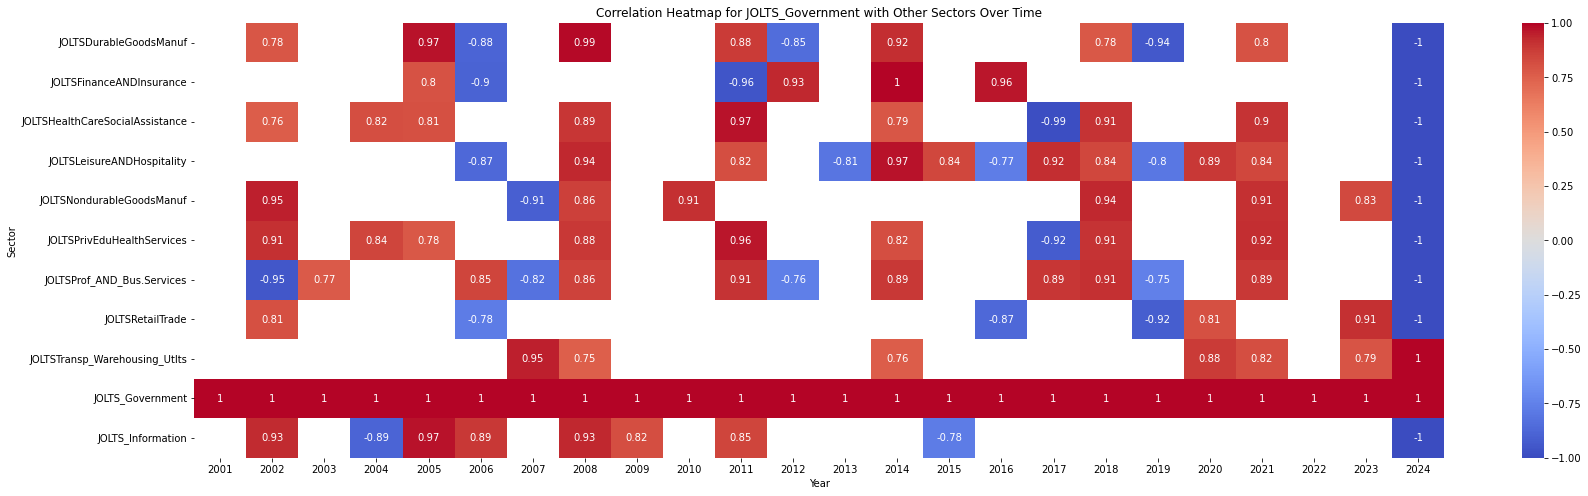

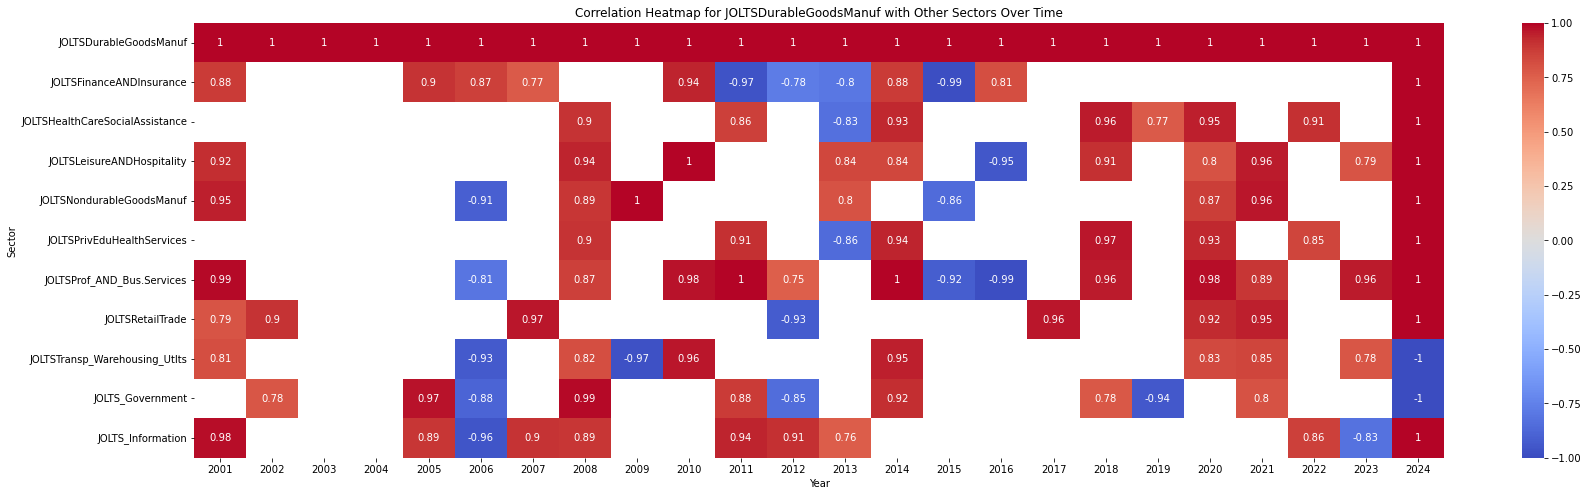

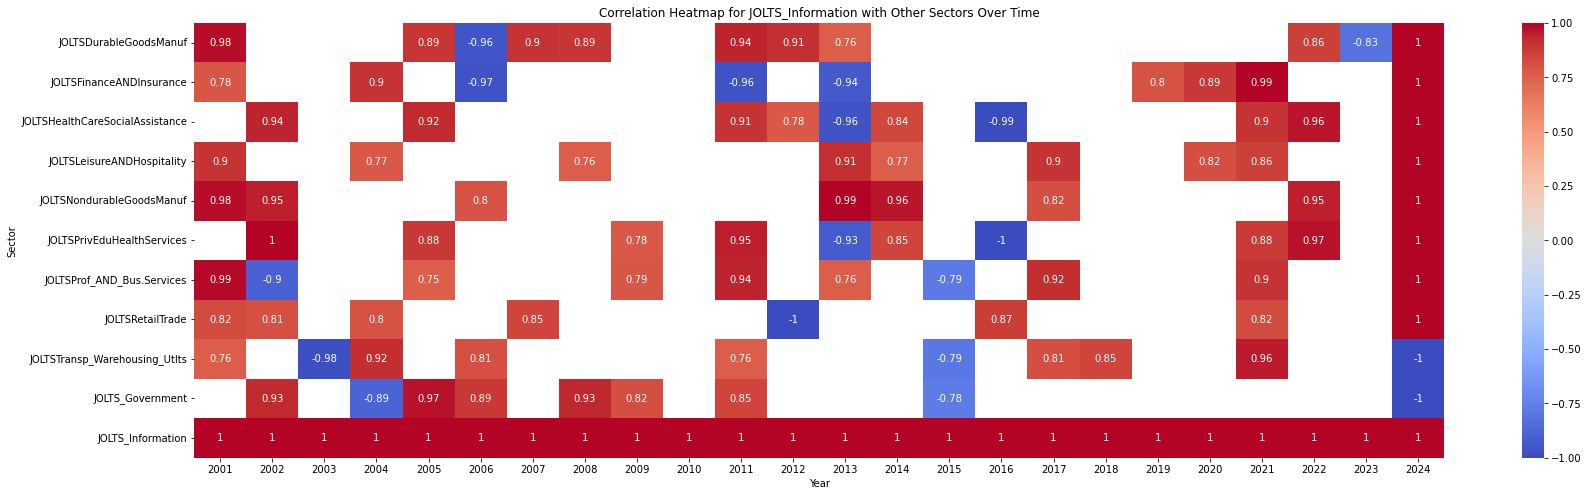

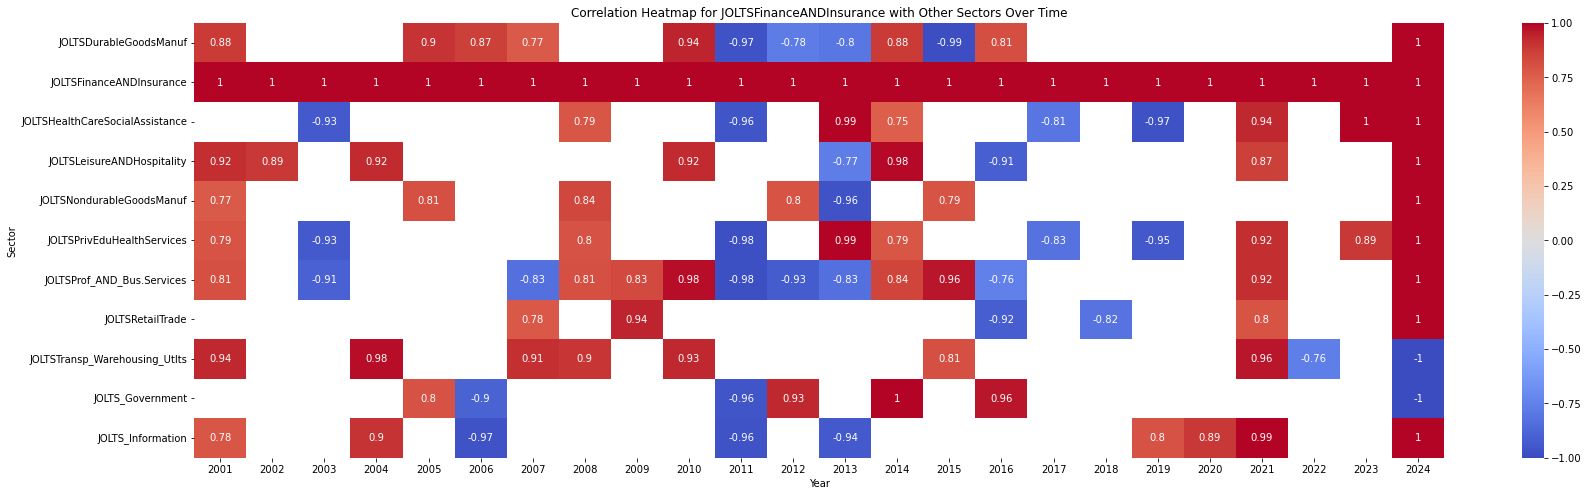

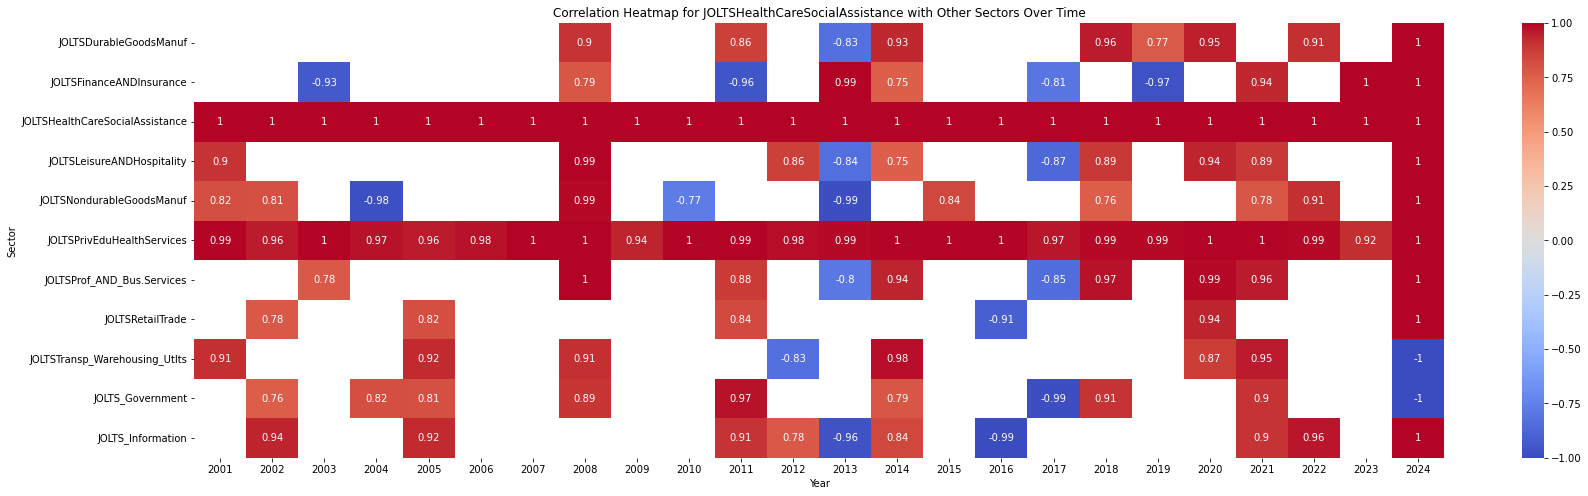

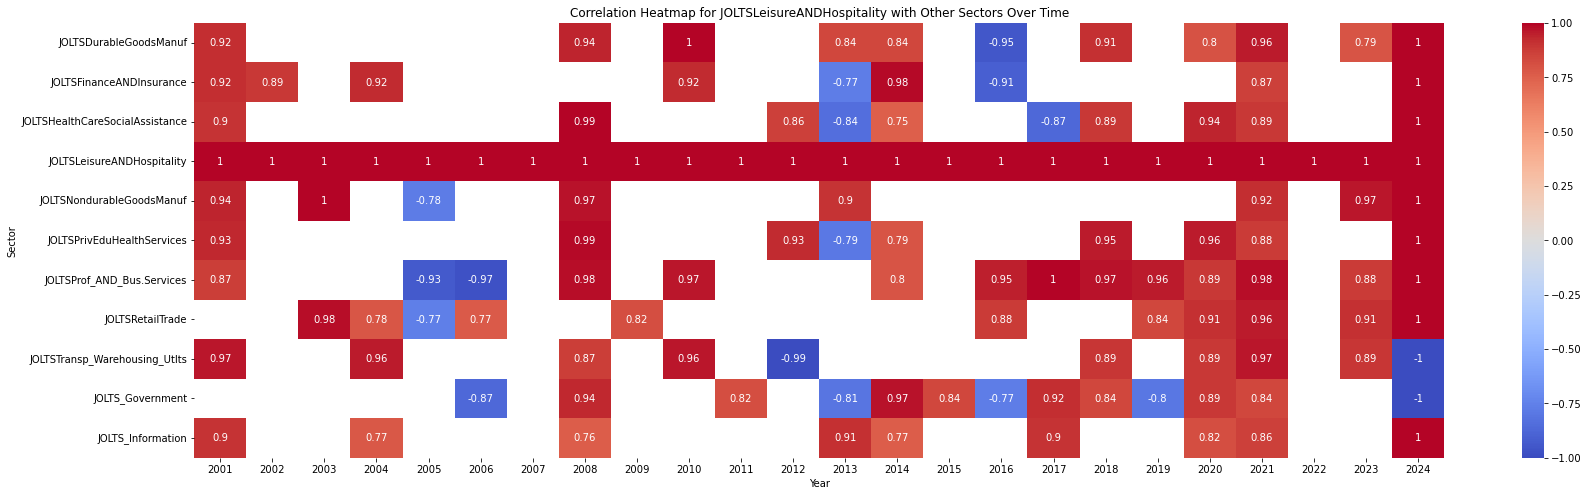

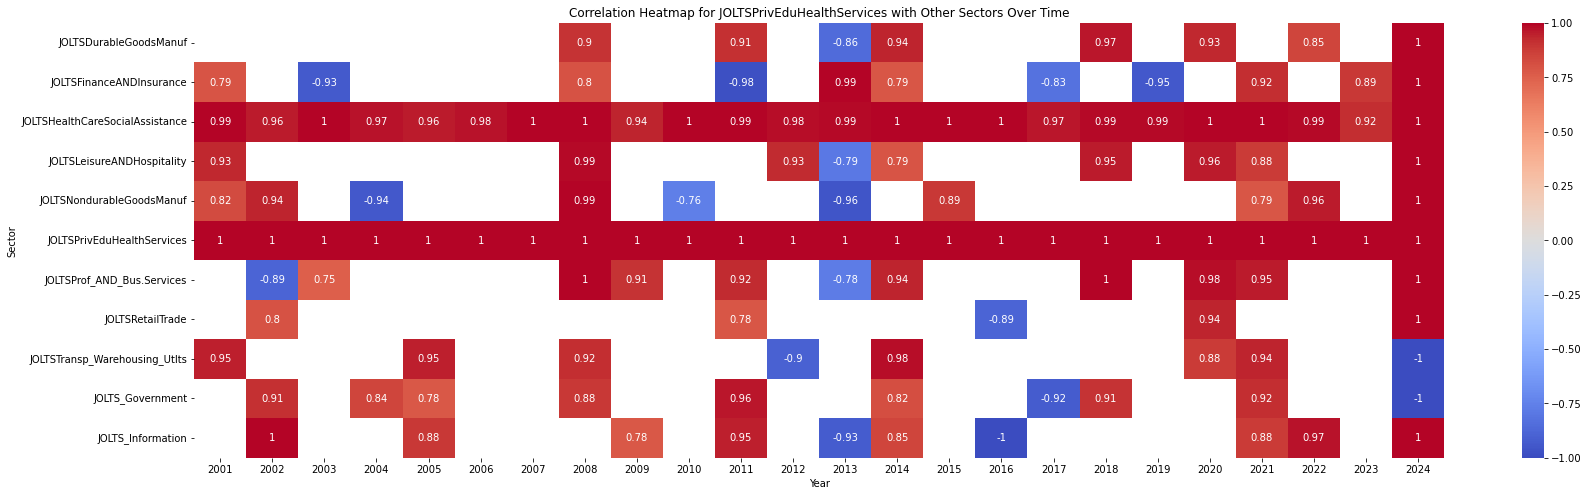

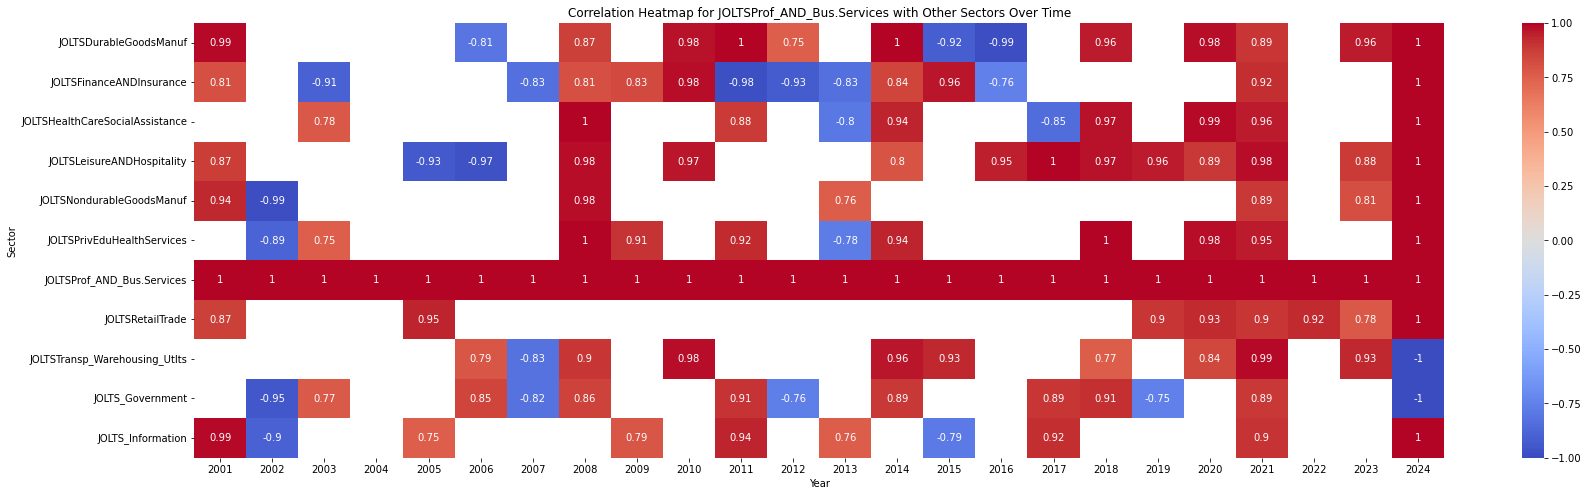

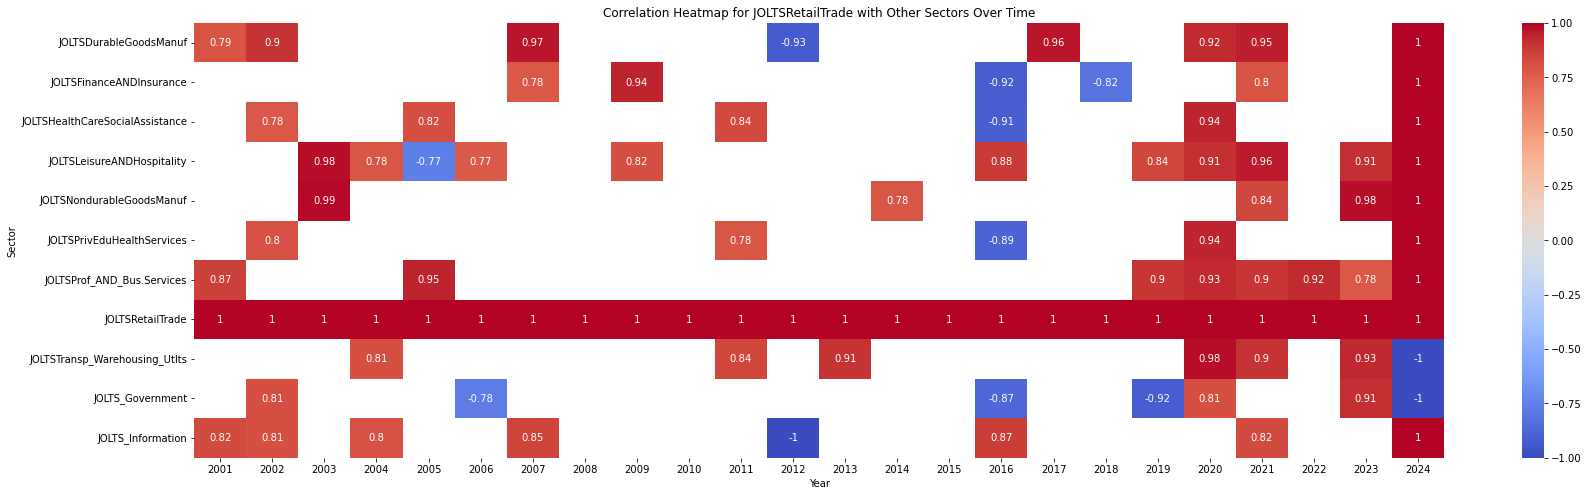

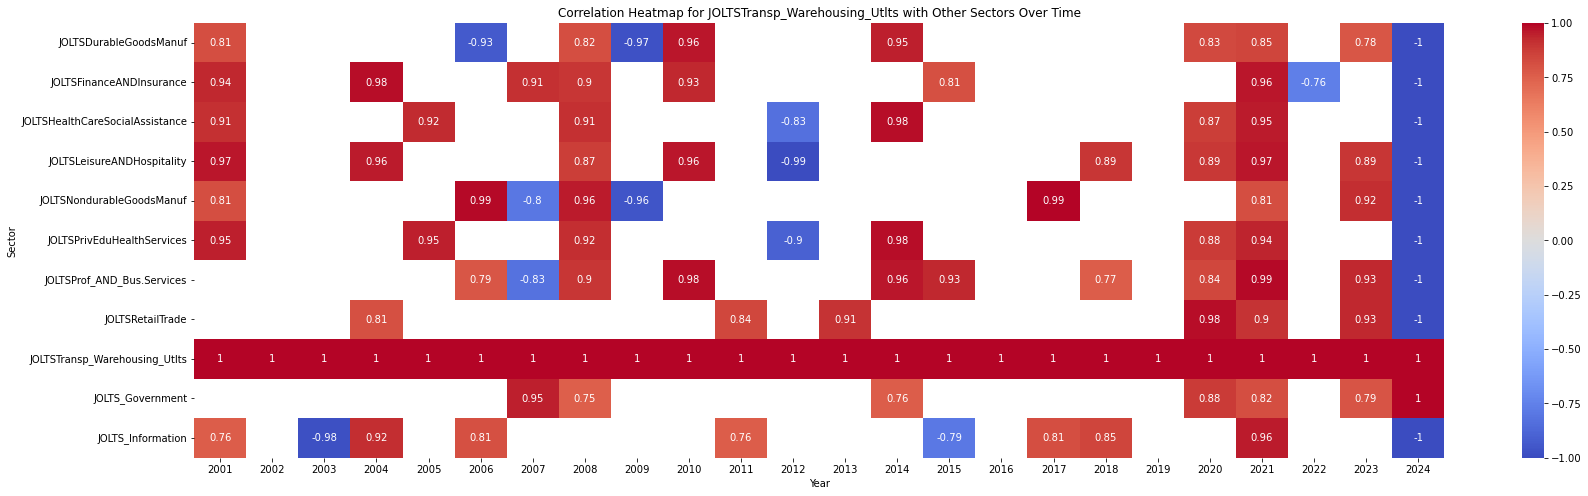

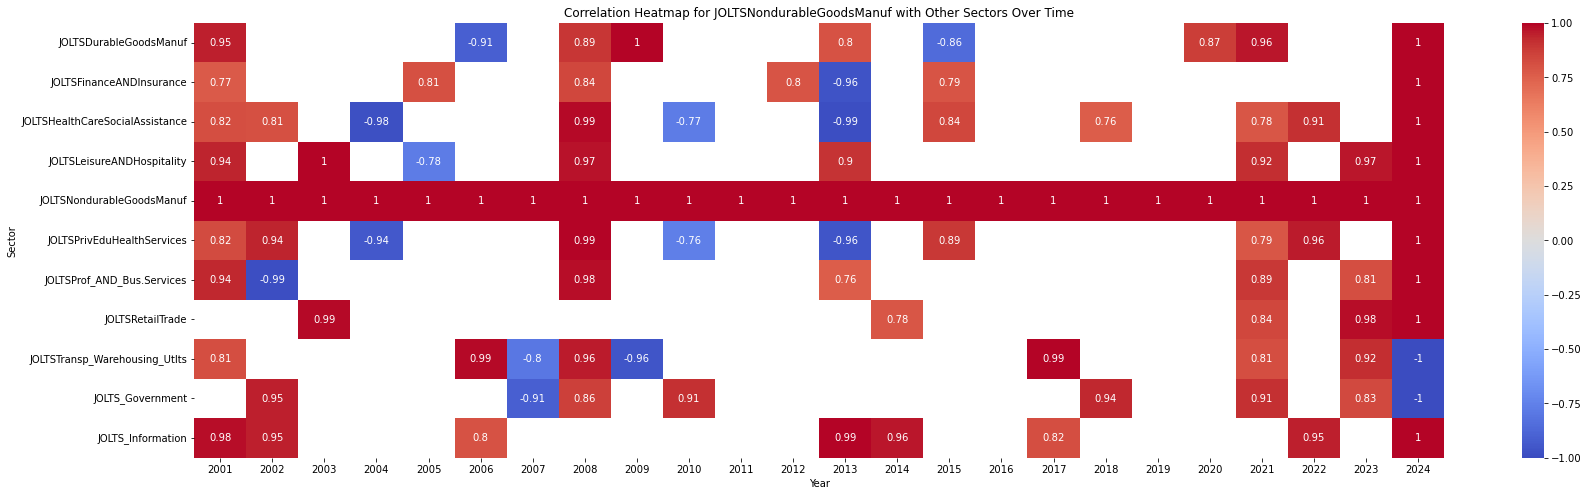

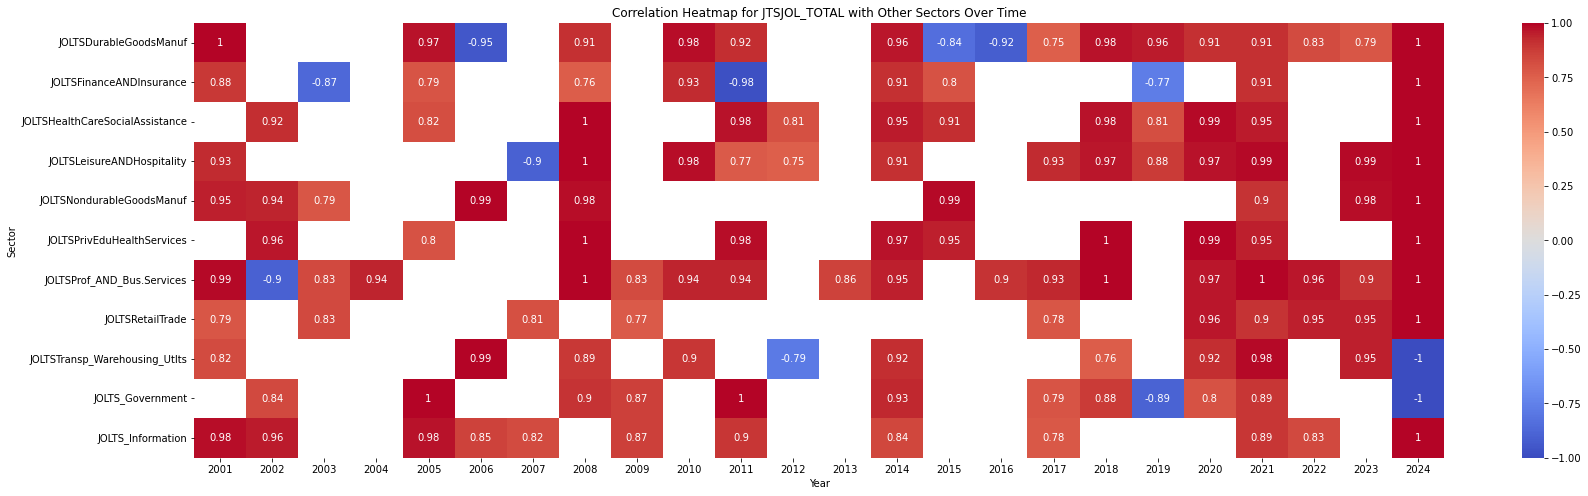

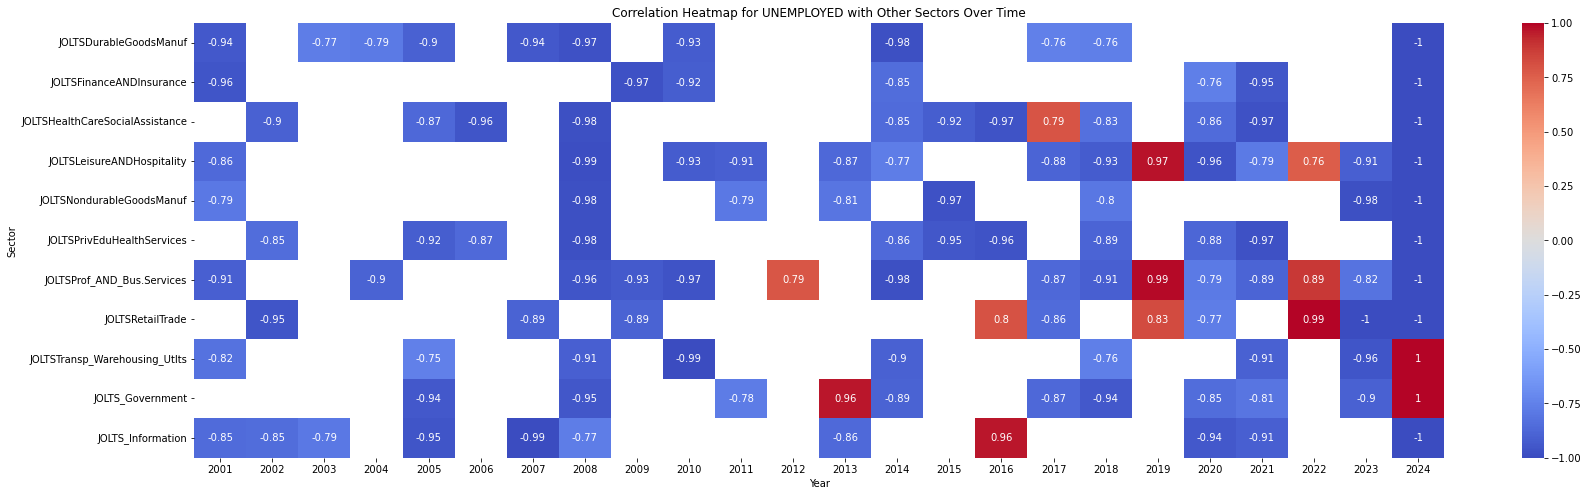

In [38]:
# Define the list of sectors to exclude from Sector_2
exclude_sectors = ['JTSJOL_TOTAL', 'UNEMPLOYED']

# Define a threshold for strong relationships
threshold = 0.75 

# Loop through each unique sector in Sector_1
for specific_sector in correlation_by_year_df['Sector_1'].unique():
    
    # Filter the DataFrame for the specific sector in Sector_1
    filtered_df = correlation_by_year_df[correlation_by_year_df['Sector_1'] == specific_sector]
    
    # Filter out excluded sectors from the Sector_2 column
    filtered_df = filtered_df[~filtered_df['Sector_2'].isin(exclude_sectors)]
    
    # Filter for strong positive or negative correlations
    strong_relationships_df = filtered_df[(filtered_df['Correlation'] >= threshold) | 
                                          (filtered_df['Correlation'] <= -threshold)]

    # Check if there are any strong relationships to plot
    if not strong_relationships_df.empty:
        # Pivot the DataFrame for heatmap
        heatmap_data = strong_relationships_df.pivot('Sector_2', 'Year', 'Correlation')
        
        # Plot the heatmap
        plt.figure(figsize=(28, 8))
        sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
        plt.title(f'Correlation Heatmap for {specific_sector} with Other Sectors Over Time')
        plt.xlabel('Year')
        plt.ylabel('Sector')
        plt.show()
    else:
        print(f"No strong relationships for {specific_sector} based on the threshold.")


In [39]:
# Ensure DATE is a datetime object and set as index for time-series plotting
JOLTS_SECTORS_combined_df['DATE'] = pd.to_datetime(JOLTS_SECTORS_combined_df['DATE'])
JOLTS_SECTORS_combined_df.set_index('DATE', inplace=True)

In [44]:
# Step 1: Calculate percentage change for JTSJOL_TOTAL and UNEMPLOYED
JOLTS_SECTORS_combined_df['JTSJOL_TOTAL_pct_change'] = JOLTS_SECTORS_combined_df['JTSJOL_TOTAL'].pct_change() * 100
JOLTS_SECTORS_combined_df['UNEMPLOYED_pct_change'] = JOLTS_SECTORS_combined_df['UNEMPLOYED'].pct_change() * 100

# Step 2: Calculate rolling mean and 1-standard deviation for percentage change
# Step 2: Calculate rolling mean and 1-standard deviation for percentage change
window_size = 6  # Changed to 6 months
JOLTS_SECTORS_combined_df['JTSJOL_TOTAL_std'] = JOLTS_SECTORS_combined_df['JTSJOL_TOTAL_pct_change'].rolling(window=window_size).std()
JOLTS_SECTORS_combined_df['UNEMPLOYED_std'] = JOLTS_SECTORS_combined_df['UNEMPLOYED_pct_change'].rolling(window=window_size).std()

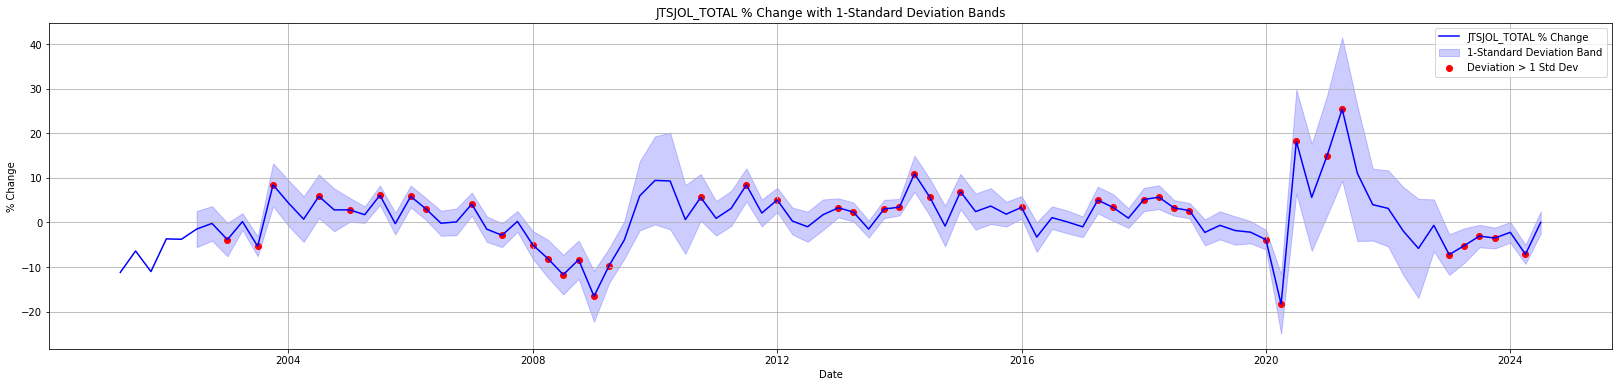

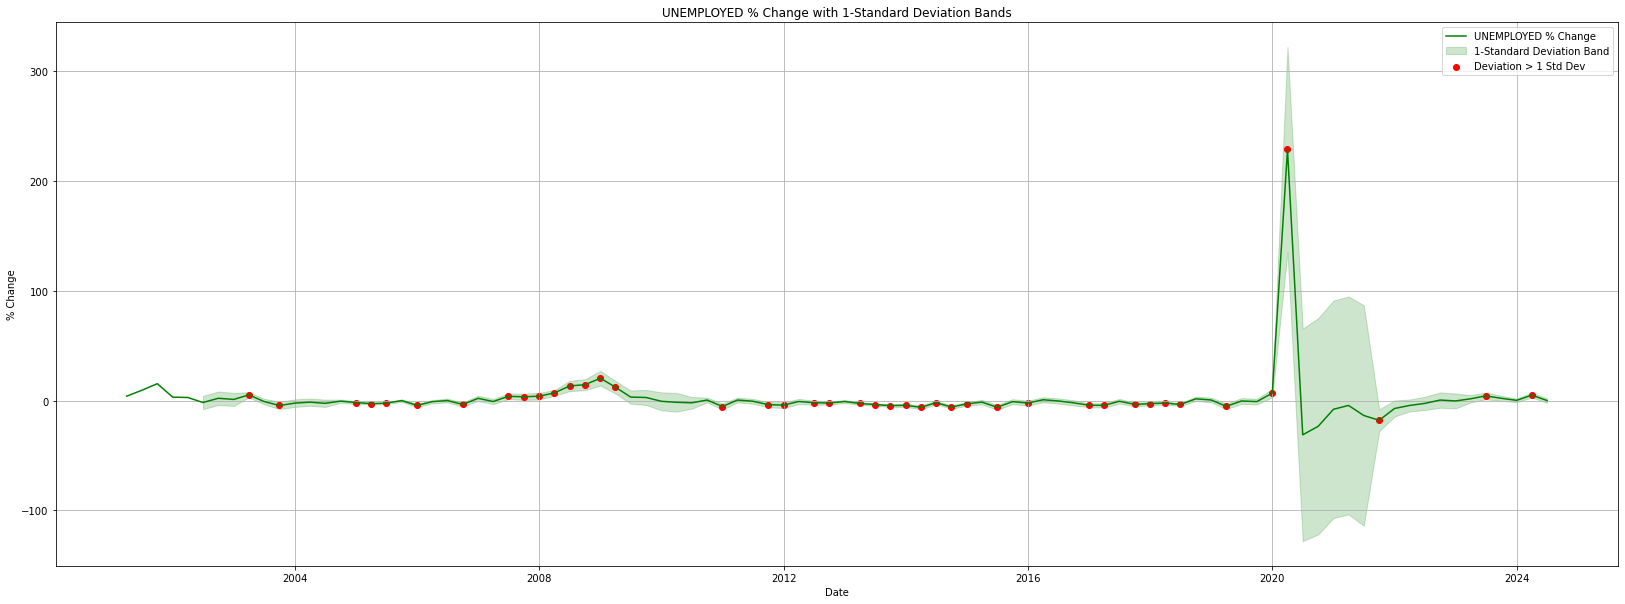

In [45]:
# Step 3: Plotting the percentage changes with 1-standard deviation bands

# Plot for JTSJOL_TOTAL
plt.figure(figsize=(28, 6))
plt.plot(JOLTS_SECTORS_combined_df.index, JOLTS_SECTORS_combined_df['JTSJOL_TOTAL_pct_change'], label='JTSJOL_TOTAL % Change', color='blue')
plt.fill_between(JOLTS_SECTORS_combined_df.index, 
                 JOLTS_SECTORS_combined_df['JTSJOL_TOTAL_pct_change'] - JOLTS_SECTORS_combined_df['JTSJOL_TOTAL_std'], 
                 JOLTS_SECTORS_combined_df['JTSJOL_TOTAL_pct_change'] + JOLTS_SECTORS_combined_df['JTSJOL_TOTAL_std'], 
                 color='blue', alpha=0.2, label='1-Standard Deviation Band')

# Highlight deviations beyond 1 standard deviation
deviation_highlight = np.abs(JOLTS_SECTORS_combined_df['JTSJOL_TOTAL_pct_change']) > JOLTS_SECTORS_combined_df['JTSJOL_TOTAL_std']
plt.scatter(JOLTS_SECTORS_combined_df.index[deviation_highlight], 
            JOLTS_SECTORS_combined_df['JTSJOL_TOTAL_pct_change'][deviation_highlight], 
            color='red', label='Deviation > 1 Std Dev')

plt.title('JTSJOL_TOTAL % Change with 1-Standard Deviation Bands')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.legend()
plt.grid(True)
plt.show()

# Plot for UNEMPLOYED
plt.figure(figsize=(28, 10))
plt.plot(JOLTS_SECTORS_combined_df.index, JOLTS_SECTORS_combined_df['UNEMPLOYED_pct_change'], label='UNEMPLOYED % Change', color='green')
plt.fill_between(JOLTS_SECTORS_combined_df.index, 
                 JOLTS_SECTORS_combined_df['UNEMPLOYED_pct_change'] - JOLTS_SECTORS_combined_df['UNEMPLOYED_std'], 
                 JOLTS_SECTORS_combined_df['UNEMPLOYED_pct_change'] + JOLTS_SECTORS_combined_df['UNEMPLOYED_std'], 
                 color='green', alpha=0.2, label='1-Standard Deviation Band')

# Highlight deviations beyond 1 standard deviation
deviation_highlight_unemployed = np.abs(JOLTS_SECTORS_combined_df['UNEMPLOYED_pct_change']) > JOLTS_SECTORS_combined_df['UNEMPLOYED_std']
plt.scatter(JOLTS_SECTORS_combined_df.index[deviation_highlight_unemployed], 
            JOLTS_SECTORS_combined_df['UNEMPLOYED_pct_change'][deviation_highlight_unemployed], 
            color='red', label='Deviation > 1 Std Dev')

plt.title('UNEMPLOYED % Change with 1-Standard Deviation Bands')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.legend()
plt.grid(True)
plt.show()

# Step 4: Save to a new CSV file if needed
JOLTS_SECTORS_combined_df.to_csv('JOLTS_SECTORS_combined_df_with_pct_changes_and_std.csv', index=True)


Calculate the Change in Standard Deviation:

1. First, calculate the difference (std_diff) between the standard deviation of the current period and the previous period. For example, January to February and February to March. 
This difference helps to determine whether volatility is increasing, decreasing, or remaining stable. We are looking at current period and the previous period submitted. 
Define Thresholds for Categorization:

In [57]:
# Step 1: If 'DATE' is the index, reset it to make it a column for easier manipulation
if 'DATE' not in JOLTS_SECTORS_combined_df.columns:
    JOLTS_SECTORS_combined_df = JOLTS_SECTORS_combined_df.reset_index()

# Step 1: Calculate the difference and percentage change in standard deviation
JOLTS_SECTORS_combined_df['JTSJOL_TOTAL_std_diff'] = JOLTS_SECTORS_combined_df['JTSJOL_TOTAL_std'].diff()
JOLTS_SECTORS_combined_df['JTSJOL_TOTAL_std_pct_change'] = JOLTS_SECTORS_combined_df['JTSJOL_TOTAL_std'].pct_change() * 100

JOLTS_SECTORS_combined_df['UNEMPLOYED_std_diff'] = JOLTS_SECTORS_combined_df['UNEMPLOYED_std'].diff()
JOLTS_SECTORS_combined_df['UNEMPLOYED_std_pct_change'] = JOLTS_SECTORS_combined_df['UNEMPLOYED_std'].pct_change() * 100

2. Define Threholds for Categorization: 
- Expansion: A positive change in standard deviation (std_diff > 0) indicates that volatility is increasing.
- Contraction: A negative change in standard deviation (std_diff < 0) indicates that volatility is decreasing. 
- Stable: When the change in standard deviation is zero or close to zero (e.g., std_diff = 0), it indicates no significant change in volatility.

In [ ]:

# Step 2: Categorize contractions and expansions
expansion_threshold = 0
contraction_threshold = 0

# For JTSJOL_TOTAL
JOLTS_SECTORS_combined_df['JTSJOL_TOTAL_volatility'] = np.where(
    JOLTS_SECTORS_combined_df['JTSJOL_TOTAL_std_diff'] > expansion_threshold, 'Expansion',
    np.where(JOLTS_SECTORS_combined_df['JTSJOL_TOTAL_std_diff'] < contraction_threshold, 'Contraction', 'Stable')
)

# For UNEMPLOYED
JOLTS_SECTORS_combined_df['UNEMPLOYED_volatility'] = np.where(
    JOLTS_SECTORS_combined_df['UNEMPLOYED_std_diff'] > expansion_threshold, 'Expansion',
    np.where(JOLTS_SECTORS_combined_df['UNEMPLOYED_std_diff'] < contraction_threshold, 'Contraction', 'Stable')
)

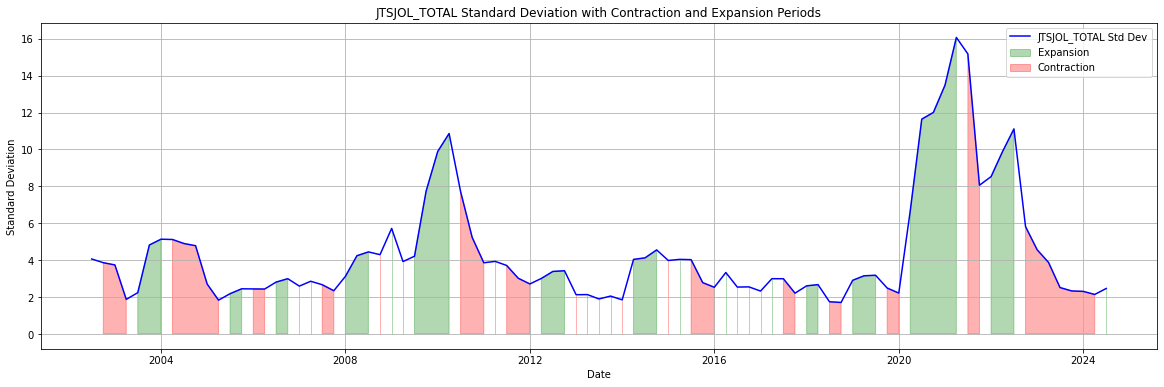

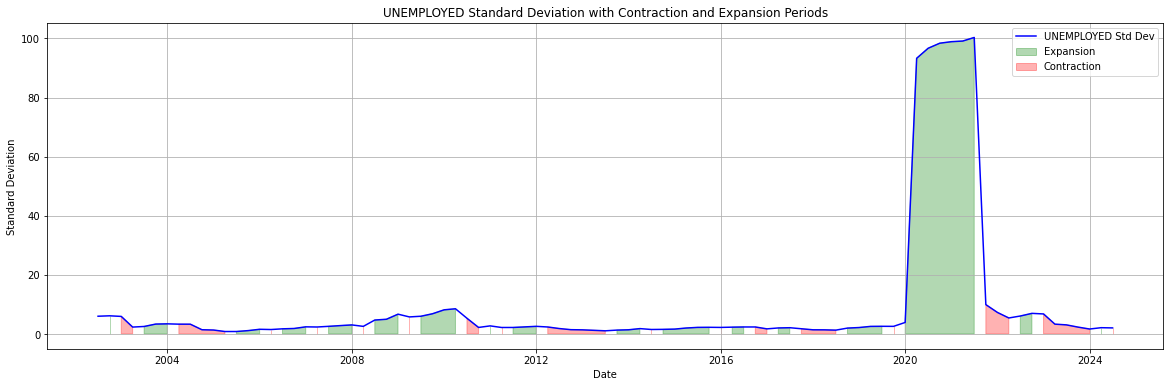

In [58]:
# Step 3: Visualization - JTSJOL_TOTAL Volatility Cycles
plt.figure(figsize=(20, 6))
plt.plot(JOLTS_SECTORS_combined_df['DATE'], JOLTS_SECTORS_combined_df['JTSJOL_TOTAL_std'], label='JTSJOL_TOTAL Std Dev', color='blue')
plt.fill_between(JOLTS_SECTORS_combined_df['DATE'],
                 JOLTS_SECTORS_combined_df['JTSJOL_TOTAL_std'],
                 where=(JOLTS_SECTORS_combined_df['JTSJOL_TOTAL_volatility'] == 'Expansion'),
                 color='green', alpha=0.3, label='Expansion')
plt.fill_between(JOLTS_SECTORS_combined_df['DATE'],
                 JOLTS_SECTORS_combined_df['JTSJOL_TOTAL_std'],
                 where=(JOLTS_SECTORS_combined_df['JTSJOL_TOTAL_volatility'] == 'Contraction'),
                 color='red', alpha=0.3, label='Contraction')
plt.title('JTSJOL_TOTAL Standard Deviation with Contraction and Expansion Periods')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()

# Step 4: Visualization - UNEMPLOYED Volatility Cycles
plt.figure(figsize=(20, 6))
plt.plot(JOLTS_SECTORS_combined_df['DATE'], JOLTS_SECTORS_combined_df['UNEMPLOYED_std'], label='UNEMPLOYED Std Dev', color='blue')
plt.fill_between(JOLTS_SECTORS_combined_df['DATE'],
                 JOLTS_SECTORS_combined_df['UNEMPLOYED_std'],
                 where=(JOLTS_SECTORS_combined_df['UNEMPLOYED_volatility'] == 'Expansion'),
                 color='green', alpha=0.3, label='Expansion')
plt.fill_between(JOLTS_SECTORS_combined_df['DATE'],
                 JOLTS_SECTORS_combined_df['UNEMPLOYED_std'],
                 where=(JOLTS_SECTORS_combined_df['UNEMPLOYED_volatility'] == 'Contraction'),
                 color='red', alpha=0.3, label='Contraction')
plt.title('UNEMPLOYED Standard Deviation with Contraction and Expansion Periods')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend()
plt.grid(True)
plt.show()


In [74]:
# Step 5: Summarize contraction and expansion periods

# Calculate the duration and magnitude of each contraction and expansion period for JTSJOL_TOTAL
def summarize_volatility_cycles(df, column):
    summary = df.groupby((df[column] != df[column].shift()).cumsum()).agg(
        Start=('DATE', 'first'),
        End=('DATE', 'last'),
        Duration=('DATE', lambda x: (x.max() - x.min()).days),
        Type=(column, 'first'),
        Magnitude=('JTSJOL_TOTAL_std_diff', 'sum')
    )
    return summary

jtsjol_cycles_summary = summarize_volatility_cycles(JOLTS_SECTORS_combined_df, 'JTSJOL_TOTAL_volatility')

# Calculate the duration and magnitude of each contraction and expansion period for UNEMPLOYED
def summarize_volatility_cycles_unemployed(df, column):
    summary = df.groupby((df[column] != df[column].shift()).cumsum()).agg(
        Start=('DATE', 'first'),
        End=('DATE', 'last'),
        Duration=('DATE', lambda x: (x.max() - x.min()).days),
        Type=(column, 'first'),
        Magnitude=('UNEMPLOYED_std_diff', 'sum')
    )
    return summary

unemployed_cycle_summary = summarize_volatility_cycles_unemployed(JOLTS_SECTORS_combined_df, 'UNEMPLOYED_volatility')


In [73]:
# Save to a new CSV file if needed
jtsjol_cycles_summary.to_csv('./JOLTS_cycles_summary.csv', index=False)


In [72]:
unemployed_cycle_summary.to_csv('./UNEMPLOYED_cycles_summary.csv', index=False)

In [60]:
# Adding volatility categories based on std deviation differences for both JTSJOL_TOTAL and UNEMPLOYED
expansion_threshold = 0
contraction_threshold = 0

# For JTSJOL_TOTAL
JOLTS_SECTORS_combined_df['JTSJOL_TOTAL_volatility'] = np.where(
    JOLTS_SECTORS_combined_df['JTSJOL_TOTAL_std_diff'] > expansion_threshold, 'Expansion',
    np.where(JOLTS_SECTORS_combined_df['JTSJOL_TOTAL_std_diff'] < contraction_threshold, 'Contraction', 'Stable')
)

# For UNEMPLOYED
JOLTS_SECTORS_combined_df['UNEMPLOYED_volatility'] = np.where(
    JOLTS_SECTORS_combined_df['UNEMPLOYED_std_diff'] > expansion_threshold, 'Expansion',
    np.where(JOLTS_SECTORS_combined_df['UNEMPLOYED_std_diff'] < contraction_threshold, 'Contraction', 'Stable')
)

# Function to calculate average duration for JTSJOL_TOTAL
def calculate_average_duration(df, column):
    summary = df.groupby((df[column] != df[column].shift()).cumsum()).agg(
        Start=('DATE', 'first'),
        End=('DATE', 'last'),
        Type=(column, 'first')
    )
    summary['Duration'] = (summary['End'] - summary['Start']).dt.days
    avg_duration = summary.groupby('Type')['Duration'].mean()
    return avg_duration

# Calculate average duration for JTSJOL_TOTAL
avg_duration_jtsjol = calculate_average_duration(JOLTS_SECTORS_combined_df, 'JTSJOL_TOTAL_volatility')

# Calculate average duration for UNEMPLOYED
avg_duration_unemployed = calculate_average_duration(JOLTS_SECTORS_combined_df, 'UNEMPLOYED_volatility')


(Type
 Contraction    104.619048
 Expansion       95.571429
 Stable         546.000000
 Name: Duration, dtype: float64,
 Type
 Contraction    112.647059
 Expansion      177.588235
 Stable         546.000000
 Name: Duration, dtype: float64)

JOLTS Cycle Summary

1. Contraction (104.62 days): On average, contraction periods in the JOLTS overall dataset last around 3.5 months.
This suggests that when job openings or market conditions become less volatile, they remain in this state for about 3.5 months before a change occurs.

2. Expansion (95.57 days):
The expansion periods, when volatility in job openings or other JOLTS-related metrics is increasing, last for roughly 3.2 months.
This indicates shorter periods of rising uncertainty or change in the job market compared to contractions.

3. Stable (546.00 days):
The stable periods, characterized by consistent volatility in job openings or other metrics, are significantly long—lasting about 1.5 years.
This implies that the job market, in general, tends to maintain stability over extended periods, with fewer disruptions in volatility.
    - **Important:*
    - **One thing to note here is that Stable does not mean no volatility. It means that volatility is reducing not low compared to history average. Therefore, it means the trend has changed not that the report value is  significantly different from the previous.**
    - **Therefore, I do not believe "Stable periods" after a contaction indicate an expansition is coming or that it infers health in job openings.** 

In [75]:
# Display the results
avg_duration_jtsjol

Type
Contraction    104.619048
Expansion       95.571429
Stable         546.000000
Name: Duration, dtype: float64

UNEMPLOYED CYCLE SUMMARY: 
1. Contraction (112.65 days): For the unemployment data, contraction periods last slightly longer at around 3.7 months.
This suggests that periods of reduced volatility in unemployment figures persist longer compared to JOLTS overall.

2. Expansion (177.59 days): The average duration of expansion in the unemployment dataset is significantly longer at around 6 months.
This indicates that periods of rising volatility in unemployment are more prolonged, possibly due to extended periods of economic uncertainty affecting the labor market.

3. Stable (546.00 days): Similar to the JOLTS overall data, stable periods in the unemployment data last around 1.5 years.
This consistency suggests that once the unemployment market stabilizes, it tends to remain stable for long durations.

In [76]:
avg_duration_unemployed

Type
Contraction    112.647059
Expansion      177.588235
Stable         546.000000
Name: Duration, dtype: float64

In [107]:
correlation_by_year_df.columns


Index(['Sector_1', 'Sector_2', 'Correlation', 'Year'], dtype='object')

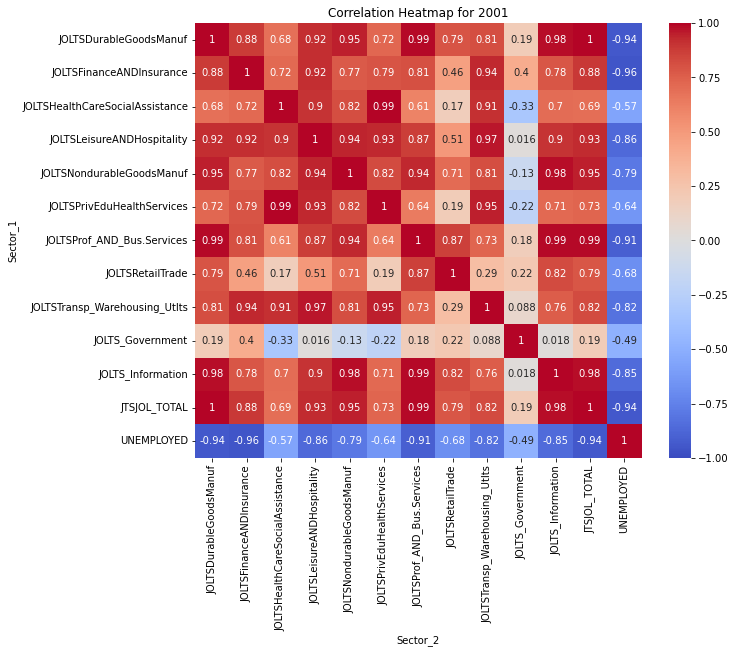

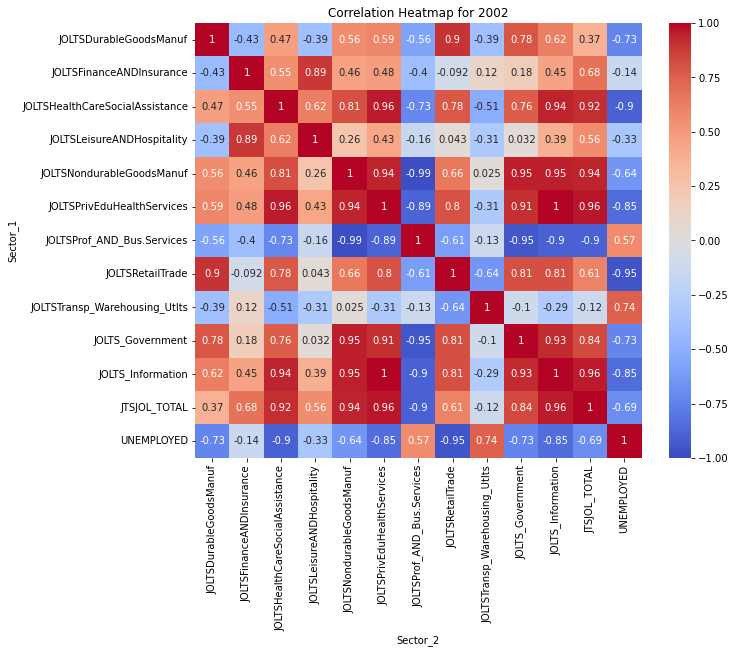

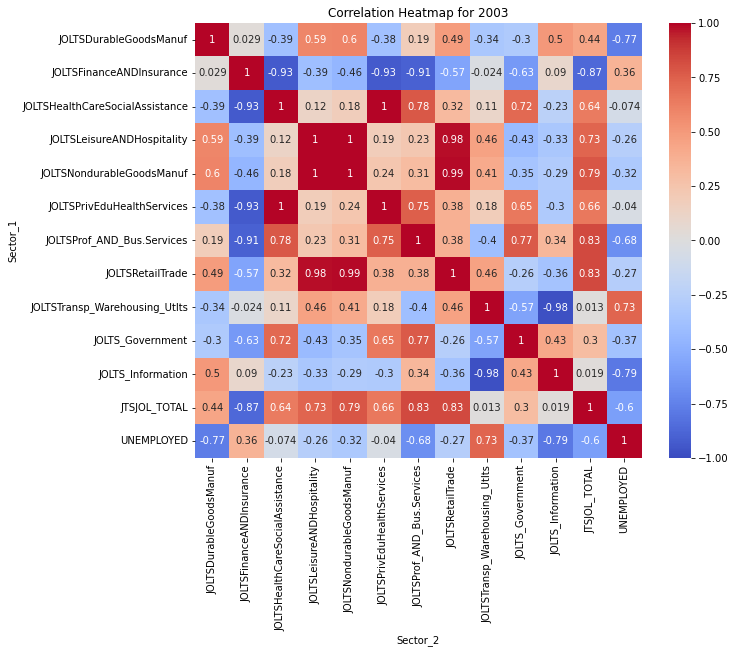

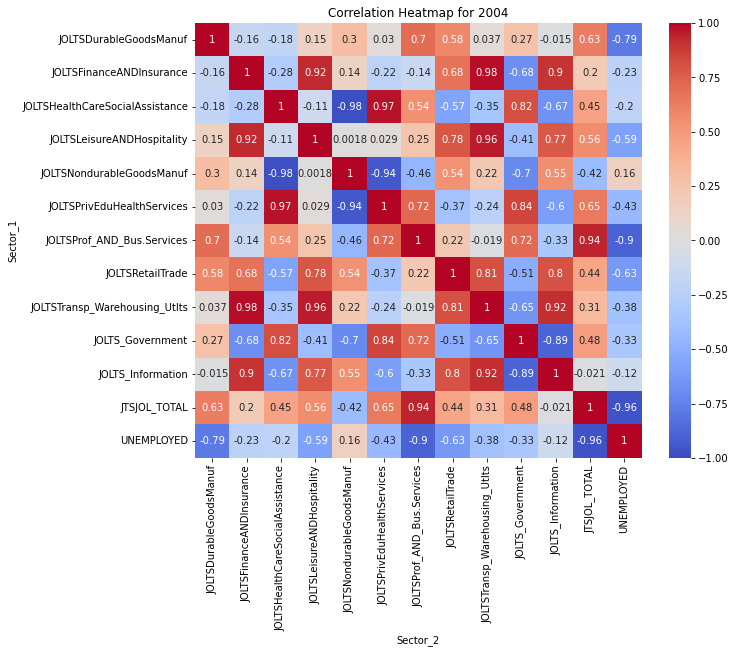

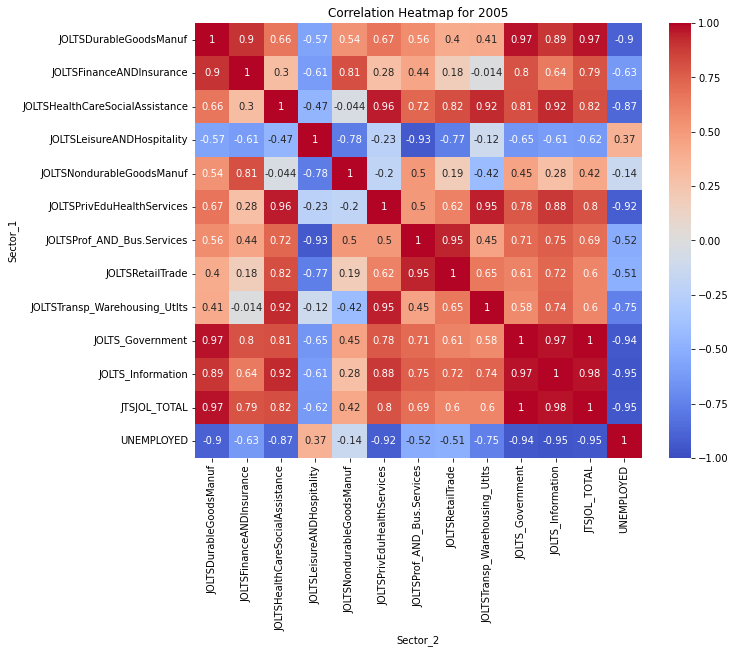

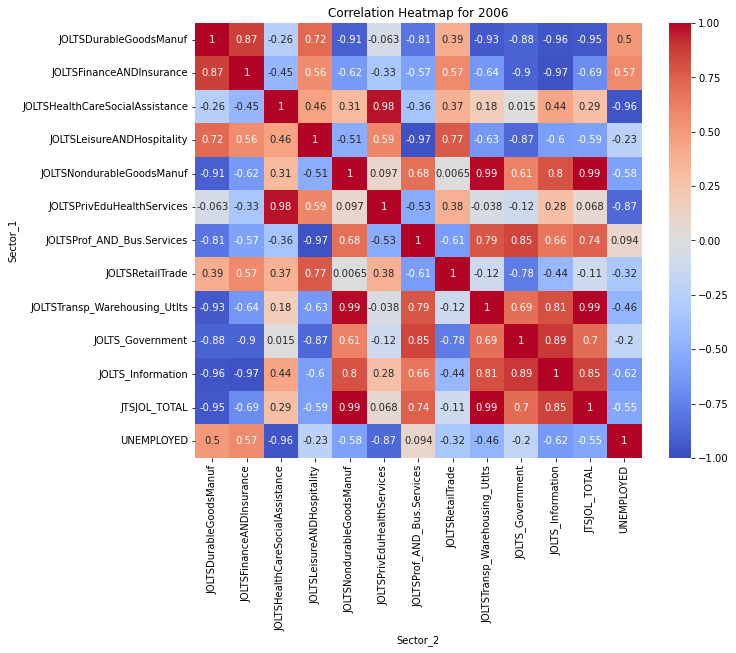

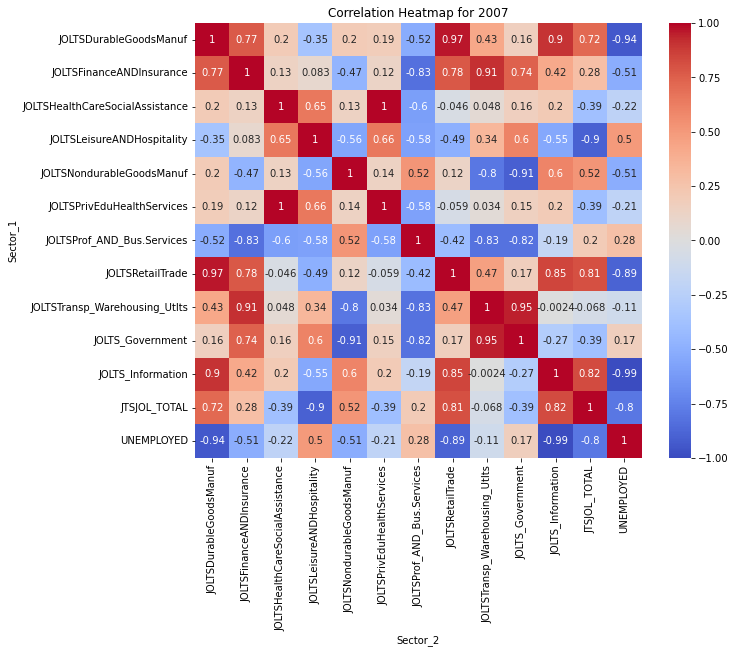

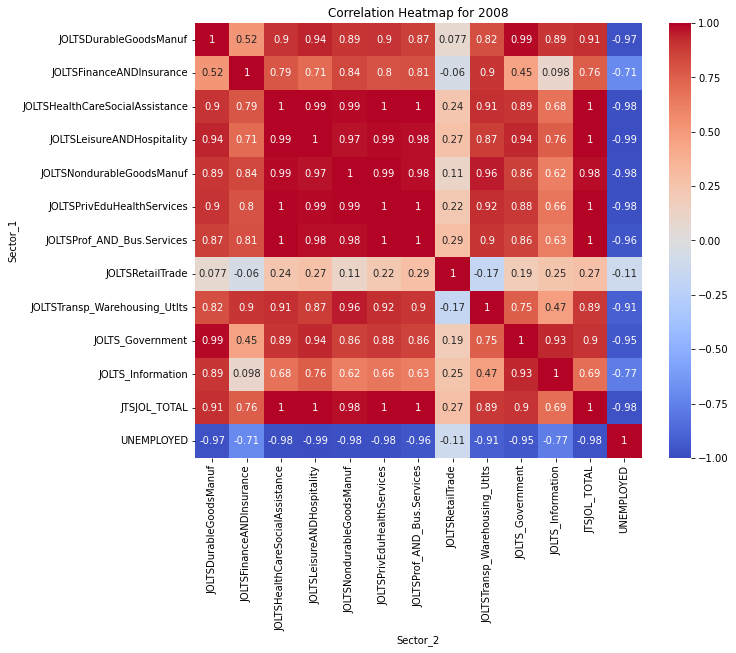

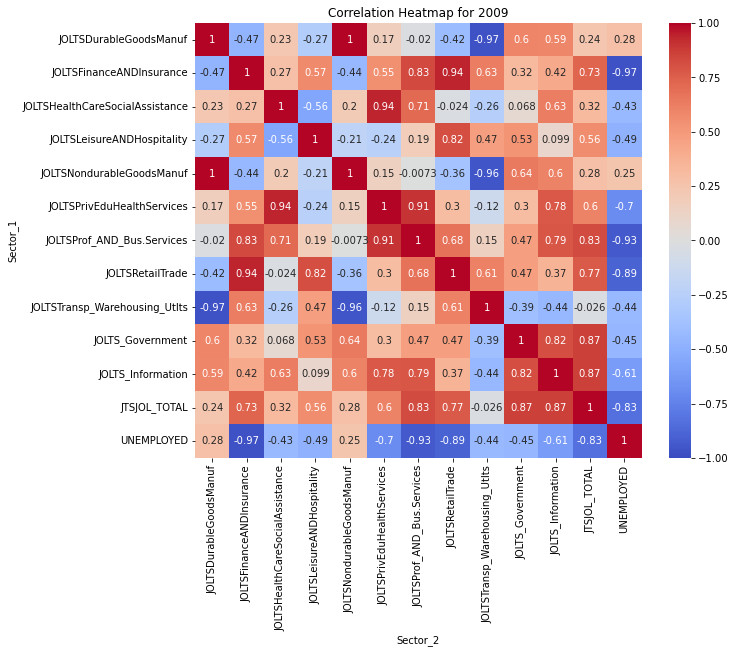

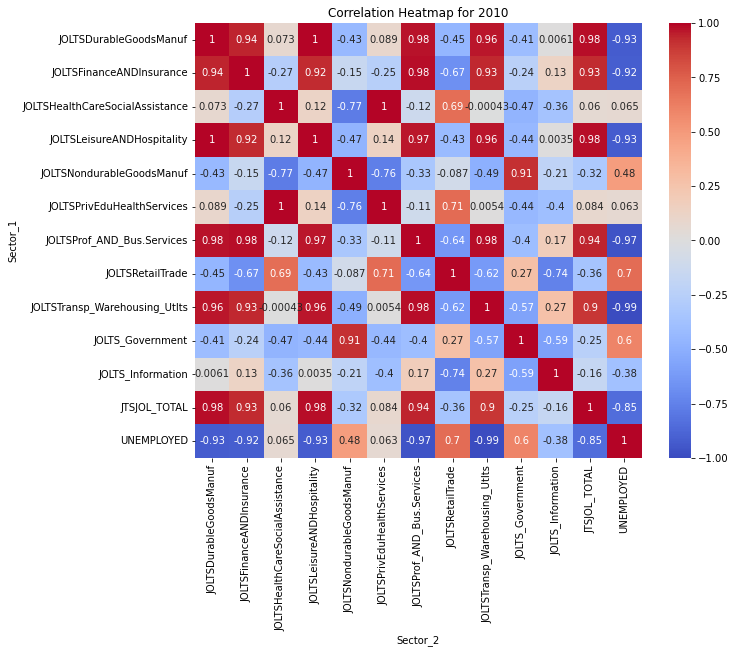

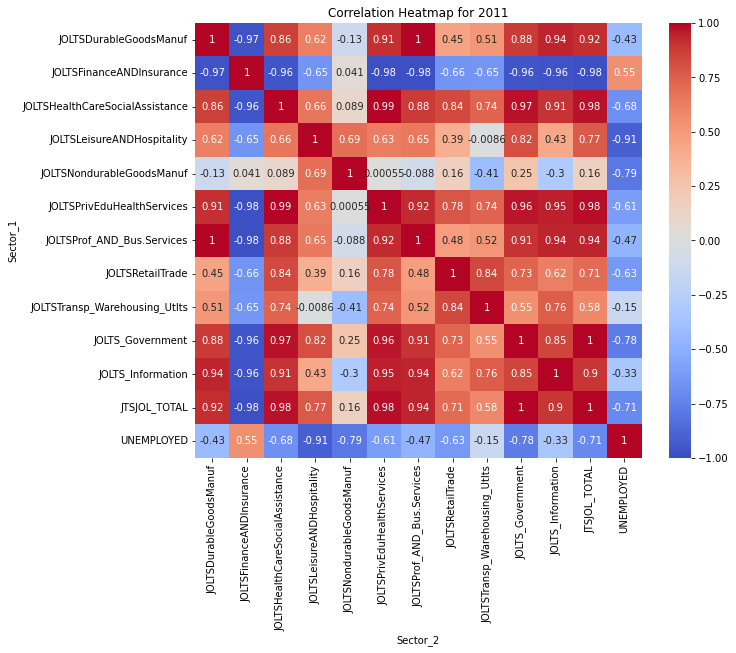

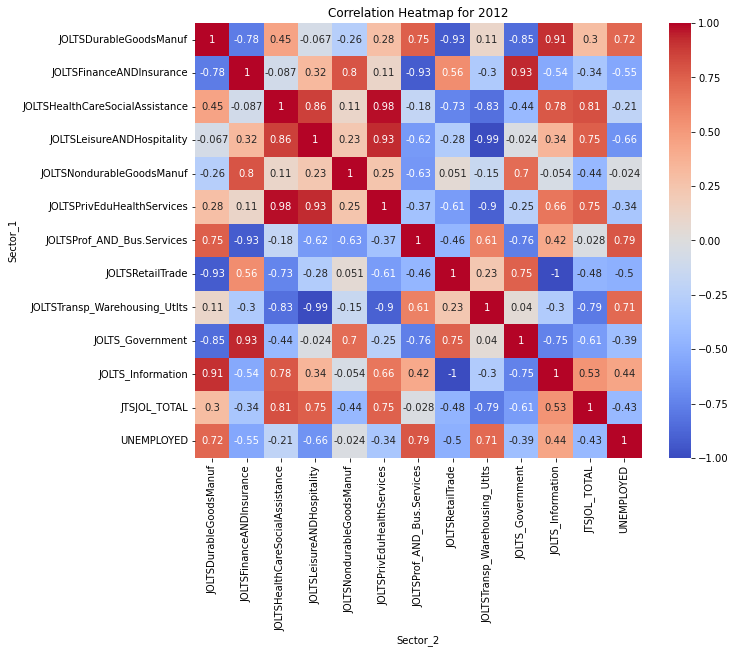

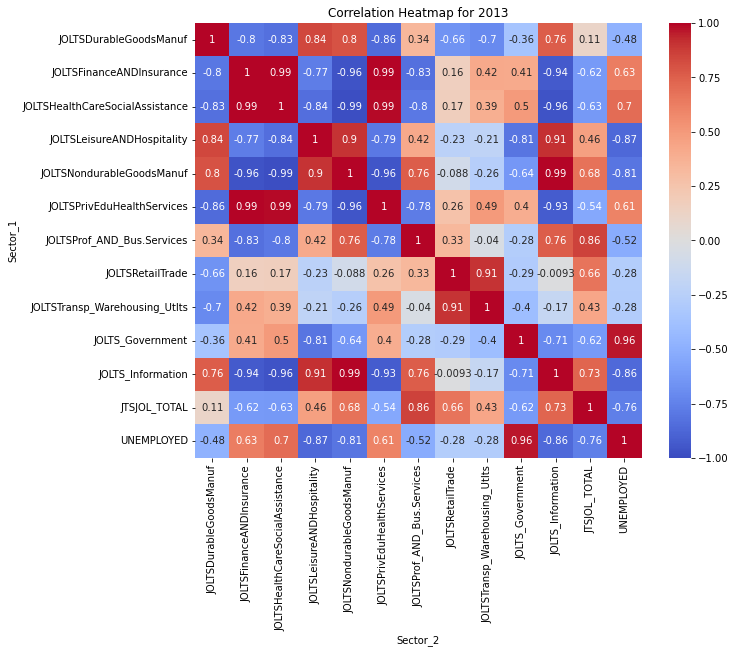

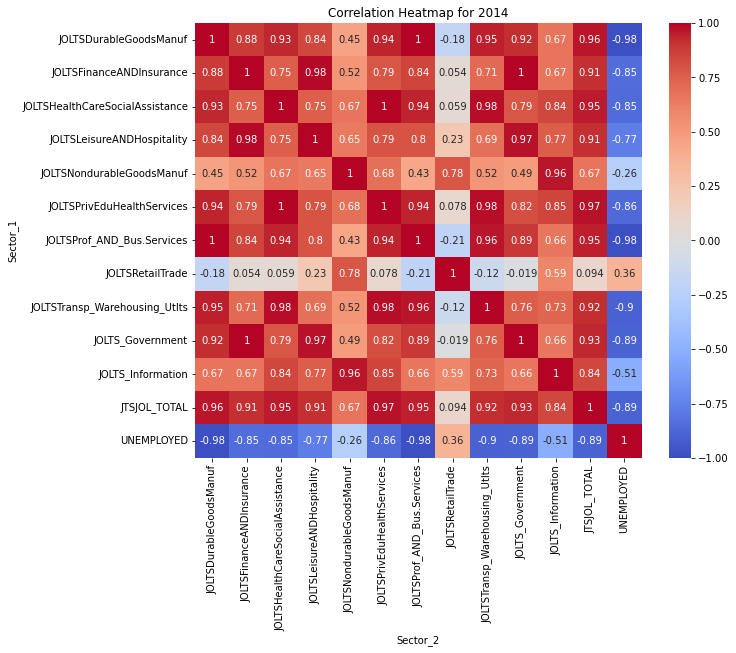

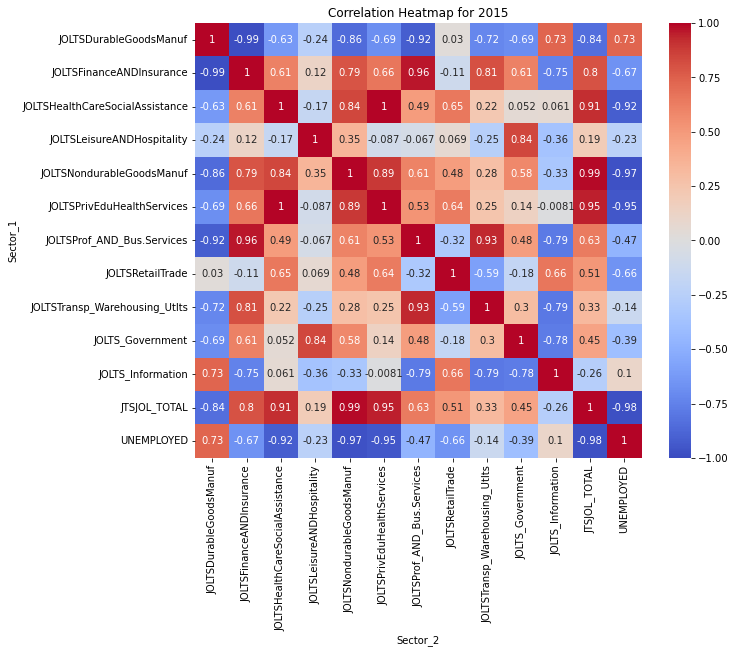

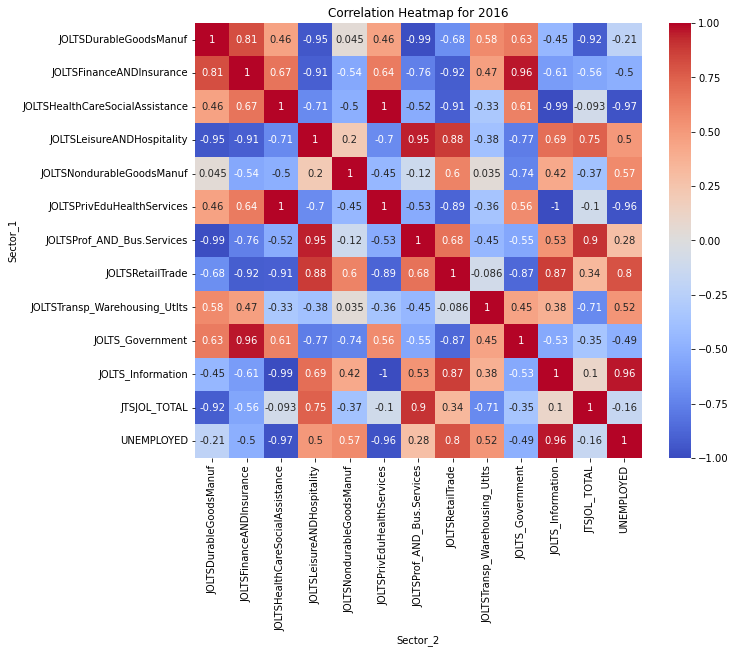

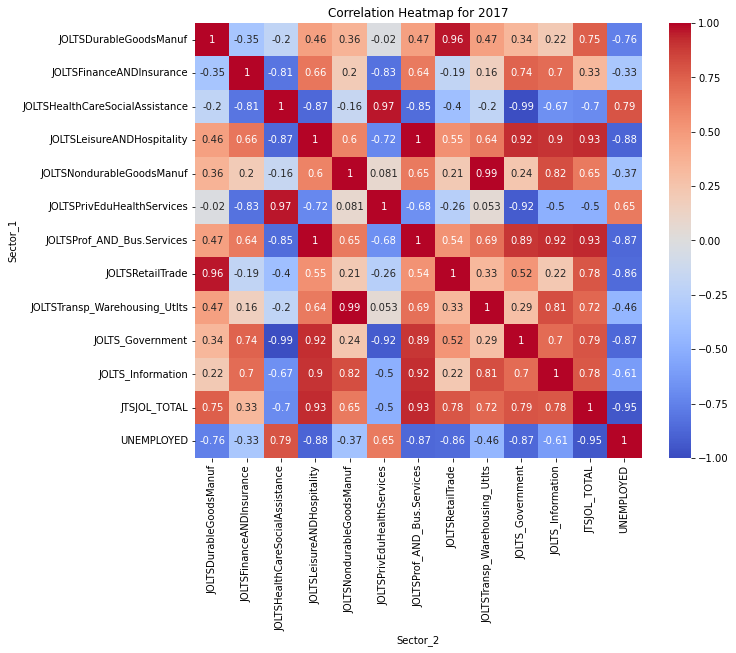

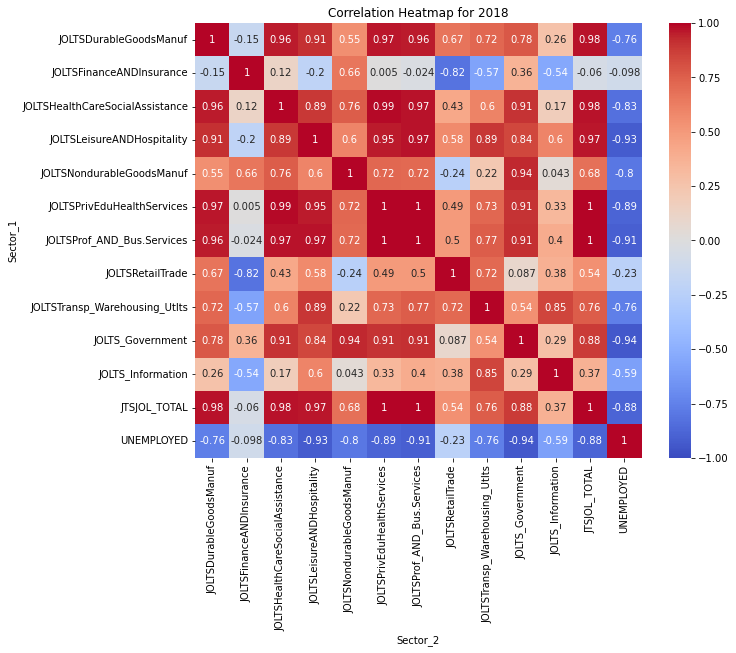

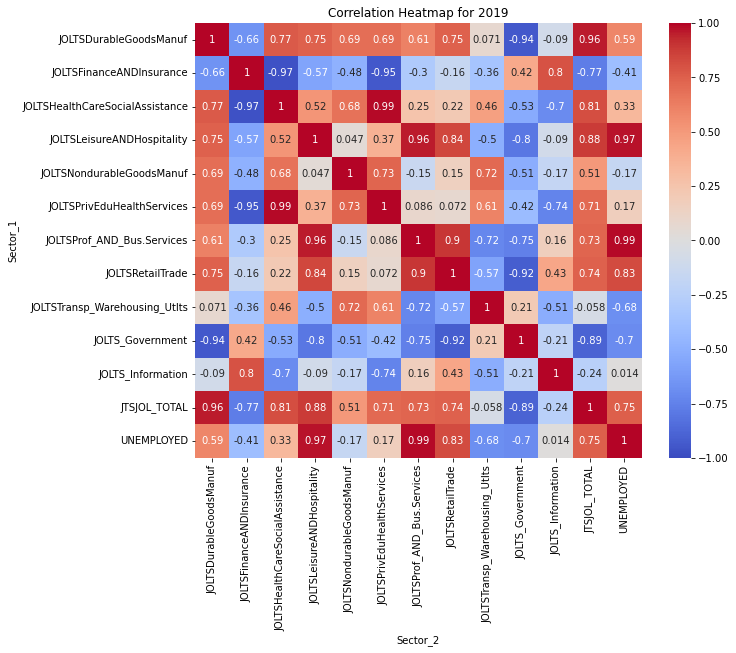

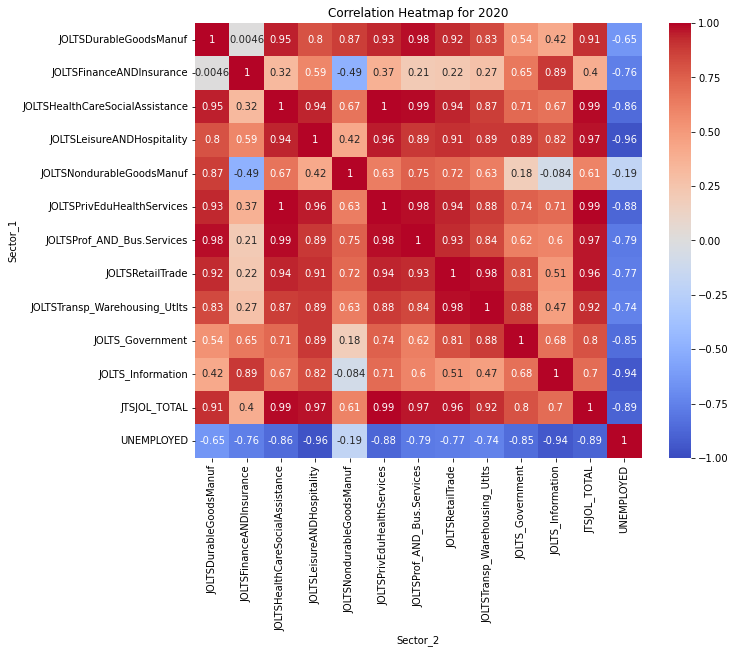

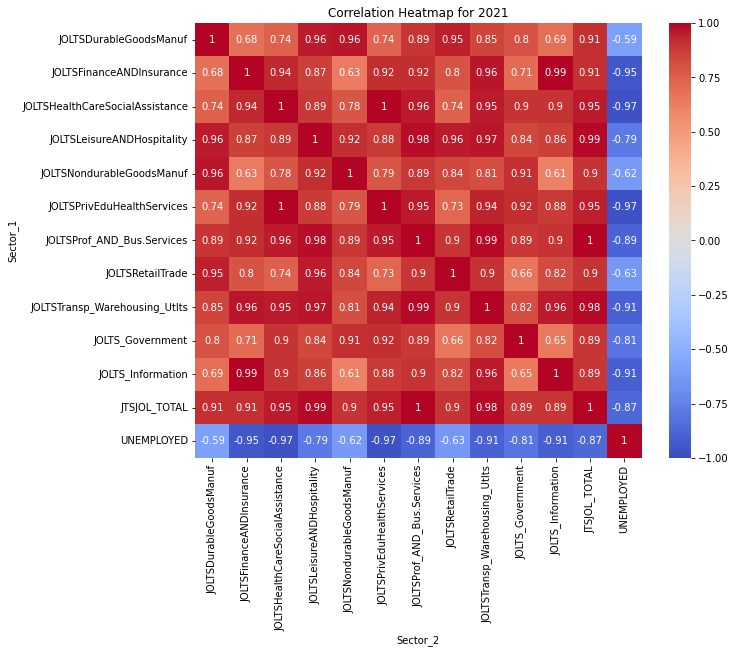

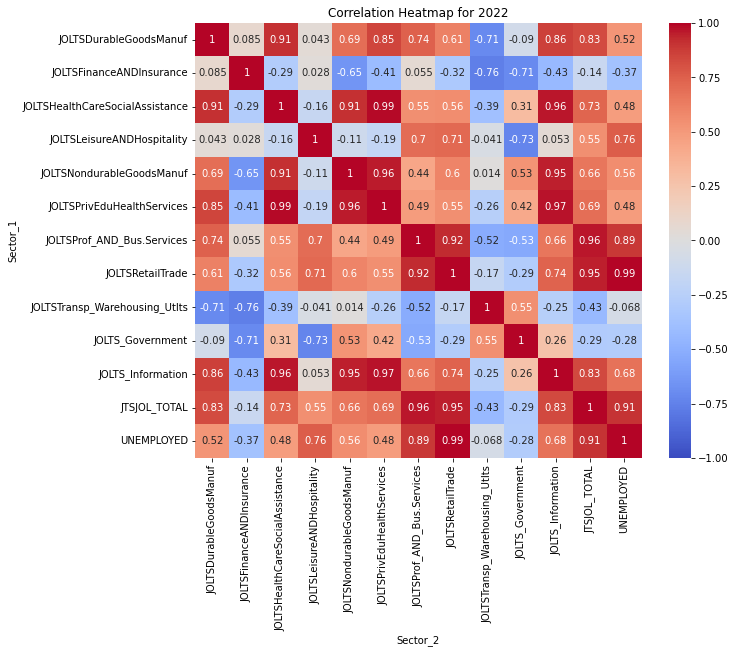

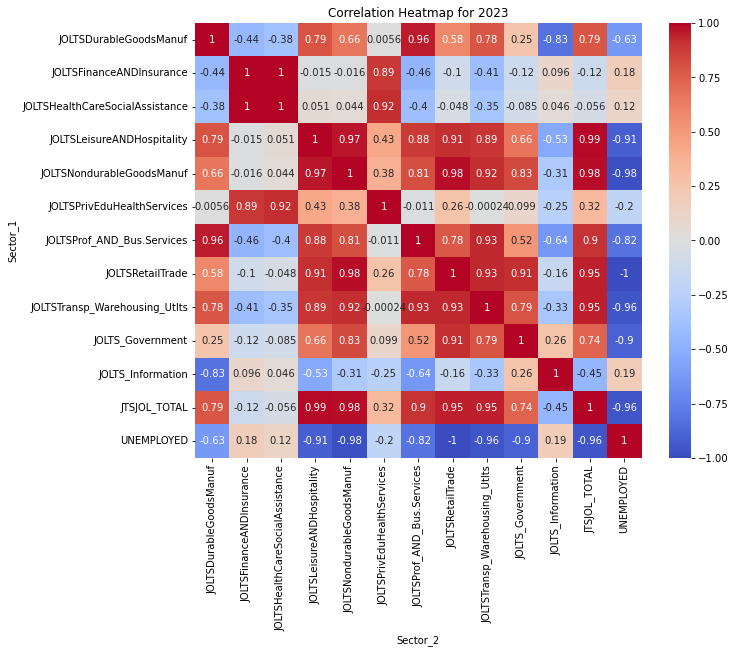

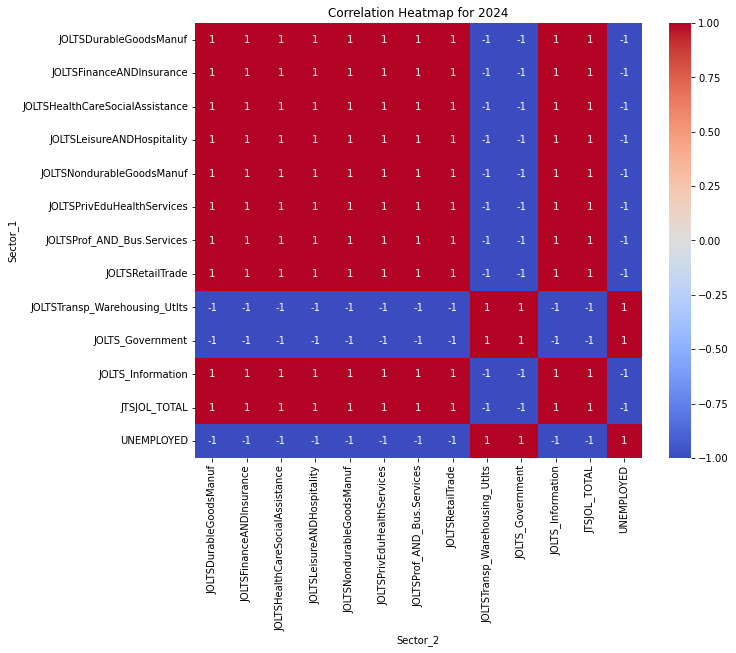

In [61]:
# Get the unique years from the data
years = sorted(correlation_by_year_df['Year'].unique())

# Loop through each year and generate a heatmap
for year in years:
    # Filter correlation data for the current year
    correlation_matrix_for_year = correlation_by_year_df[correlation_by_year_df['Year'] == year]

    # Pivot the DataFrame to create a matrix format
    correlation_matrix_pivot = correlation_matrix_for_year.pivot(index='Sector_1', columns='Sector_2', values='Correlation')

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix_pivot, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

    # Customize the plot
    plt.title(f'Correlation Heatmap for {year}')

    # Save the heatmap as an image (PNG format)
    plt.savefig(f'correlation_heatmap_{year}.png')

    # Show the plot (optional, can be removed if you just want to save the files)
    plt.show()

    # Close the figure to avoid displaying it multiple times
    plt.close()



#### CORRELATION ANALYSIS FOR THE YEARS: 
**After looking at the Heatmap by year, I noticed that certain years had more negative correlations than others. I wanted to look further into it and understand if there was any similarities between them.** 
1. **Find Strong Relationships by Year:** First I looked into how many strong relationships there were for each year. I defined strong relationship with a threhold of .70. My curiosity grow with the results. 

In [100]:
# Get the unique years from the data
years = sorted(correlation_by_year_df['Year'].unique())

# Dictionary to store the count of strong relationships for each year
strong_relationships_count = {}

# Loop through each year to count strong relationships
for year in years:
    # Filter correlation data for the current year
    correlation_matrix_for_year = correlation_by_year_df[correlation_by_year_df['Year'] == year]
    
    # Count the number of strong positive or negative correlations (>= 0.70 or <= -0.70)
    strong_relationships = correlation_matrix_for_year[
        (correlation_matrix_for_year['Correlation'] >= 0.70) |
        (correlation_matrix_for_year['Correlation'] <= -0.70)
    ]
    
    # Count the number of strong relationships
    count_strong_relationships = len(strong_relationships)
    
    # Store the count in the dictionary
    strong_relationships_count[year] = count_strong_relationships

    # Print the result for each year
    print(f'Year {year}: {count_strong_relationships} strong relationships (|Correlation| >= 0.70)')

# Convert the dictionary to a DataFrame for easy analysis and visualization if needed
strong_relationships_count_df = pd.DataFrame(list(strong_relationships_count.items()), columns=['Year', 'Strong_Relationship_Count'])

# Display the DataFrame
print(strong_relationships_count_df)


Year 2001: 119 strong relationships (|Correlation| >= 0.70)
Year 2002: 83 strong relationships (|Correlation| >= 0.70)
Year 2003: 53 strong relationships (|Correlation| >= 0.70)
Year 2004: 59 strong relationships (|Correlation| >= 0.70)
Year 2005: 85 strong relationships (|Correlation| >= 0.70)
Year 2006: 69 strong relationships (|Correlation| >= 0.70)
Year 2007: 57 strong relationships (|Correlation| >= 0.70)
Year 2008: 127 strong relationships (|Correlation| >= 0.70)
Year 2009: 55 strong relationships (|Correlation| >= 0.70)
Year 2010: 67 strong relationships (|Correlation| >= 0.70)
Year 2011: 97 strong relationships (|Correlation| >= 0.70)
Year 2012: 69 strong relationships (|Correlation| >= 0.70)
Year 2013: 87 strong relationships (|Correlation| >= 0.70)
Year 2014: 115 strong relationships (|Correlation| >= 0.70)
Year 2015: 67 strong relationships (|Correlation| >= 0.70)
Year 2016: 69 strong relationships (|Correlation| >= 0.70)
Year 2017: 79 strong relationships (|Correlation| >= 

2. **Visualize:**  I then wanted to see the number of strong relationships (negative and positive) by year. 

In [105]:
# Dictionary to store the counts of strong positive and negative relationships for each year
strong_positive_count = {}
strong_negative_count = {}

# Loop through each year to count strong relationships
for year in years:
    # Filter correlation data for the current year
    correlation_matrix_for_year = correlation_by_year_df[correlation_by_year_df['Year'] == year]
    
    # Count the number of strong positive correlations (>= 0.70)
    strong_positive_relationships = correlation_matrix_for_year[
        correlation_matrix_for_year['Correlation'] >= 0.70
    ]
    count_strong_positive = len(strong_positive_relationships)
    
    # Count the number of strong negative correlations (<= -0.70)
    strong_negative_relationships = correlation_matrix_for_year[
        correlation_matrix_for_year['Correlation'] <= -0.70
    ]
    count_strong_negative = len(strong_negative_relationships)
    
    # Store the counts in the respective dictionaries
    strong_positive_count[year] = count_strong_positive
    strong_negative_count[year] = count_strong_negative

# Convert the dictionaries to DataFrames for easy plotting
positive_df = pd.DataFrame(list(strong_positive_count.items()), columns=['Year', 'Positive_Count'])
negative_df = pd.DataFrame(list(strong_negative_count.items()), columns=['Year', 'Negative_Count'])

# Merge the two DataFrames on 'Year'
relationship_df = pd.merge(positive_df, negative_df, on='Year')



#### Interpretation of Results:
High Number of Strong Relationships:

1. Years with high counts of strong relationships, such as 2001, 2008, 2014, 2020, 2021, and 2024, suggest that many sectors were either strongly correlated or inversely correlated during these periods.
2. High correlations could be due to significant economic events or market conditions affecting multiple sectors similarly. 

For example:
        - 2001: After the dot-com bubble burst, markets were highly correlated as sectors moved together in reaction to the economic downturn.
        - 2008: The global financial crisis led to strong correlations as almost all sectors were affected simultaneously.
        - 2020: The COVID-19 pandemic created unprecedented economic conditions, leading to strong relationships across sectors.
        - 2021 and 2024: These years might be showing ongoing economic recovery or reactions to significant events such as fiscal policies or global market movements.


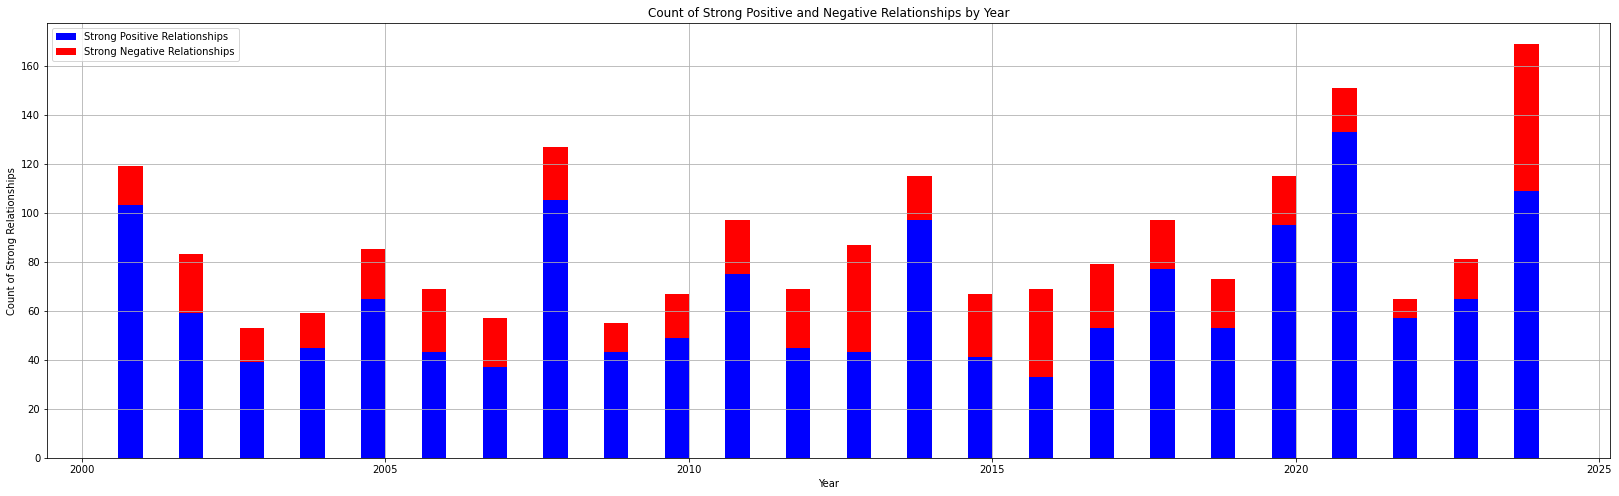

In [104]:
# Set the width of the bars to half of the current default
bar_width = 0.4  # Adjust this value to control the bar width

# Plotting the stacked bar graph
plt.figure(figsize=(28, 8))

# Stacked bar graph with adjusted width
plt.bar(relationship_df['Year'] - bar_width/2, relationship_df['Positive_Count'], width=bar_width, color='blue', label='Strong Positive Relationships')
plt.bar(relationship_df['Year'] - bar_width/2, relationship_df['Negative_Count'], bottom=relationship_df['Positive_Count'], width=bar_width, color='red', label='Strong Negative Relationships')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Count of Strong Relationships')
plt.title('Count of Strong Positive and Negative Relationships by Year')
plt.legend()
plt.grid(True)
plt.show()

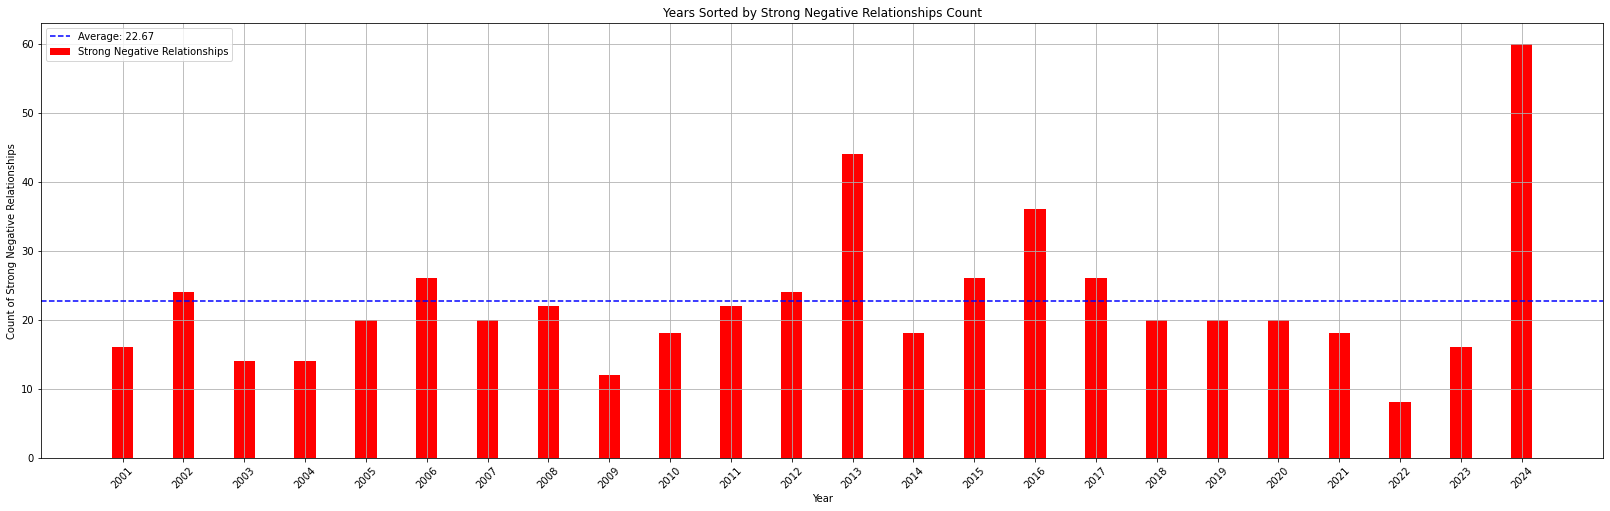

In [103]:

# Sort the DataFrame by 'Negative_Count' in descending order
sorted_df = relationship_df.sort_values(by='Negative_Count', ascending=False)

# Calculate the average count of strong negative relationships
average_negative_count = sorted_df['Negative_Count'].mean()

# Plot the bar chart for negative relationships
plt.figure(figsize=(28, 8))
width = 0.35  # Width of the bars

# Create bars for negative relationships with sorted years
plt.bar(sorted_df['Year'] + width/2, sorted_df['Negative_Count'], width=width, color='red', label='Strong Negative Relationships')

# Add a horizontal line for the average negative count
plt.axhline(average_negative_count, color='blue', linestyle='--', label=f'Average: {average_negative_count:.2f}')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Count of Strong Negative Relationships')
plt.title('Years Sorted by Strong Negative Relationships Count')
plt.xticks(ticks=sorted_df['Year'] + width/2, labels=sorted_df['Year'], rotation=45)  # Adjust x-ticks to match the sorted years
plt.legend()
plt.grid(True)
plt.show()




**Cluster Analysis on the Years.**
A Kmeans cluster analysis was used to further segment / group the years based on their strong relationship counts. 
The results grouped 2024 with economically volatile years known for the financial crisis (2001, 2008) and unprecedented economic years (2020).
>>
Cluster 1: Years [2001, 2008, 2014, 2020, 2021, 2024]
>>
Cluster 2: Years [2002, 2005, 2011, 2018, 2022, 2023]
>>
Cluster 0: Years [2003, 2004, 2006, 2007, 2009, 2010, 2012, 2013, 2015, 2016, 2017, 2019]


In [144]:
clustering_data = relationship_df[['Positive_Count', 'Negative_Count']].values

kmeans = KMeans(n_clusters=3, random_state=42)
relationship_df['Cluster'] = kmeans.fit_predict(clustering_data)

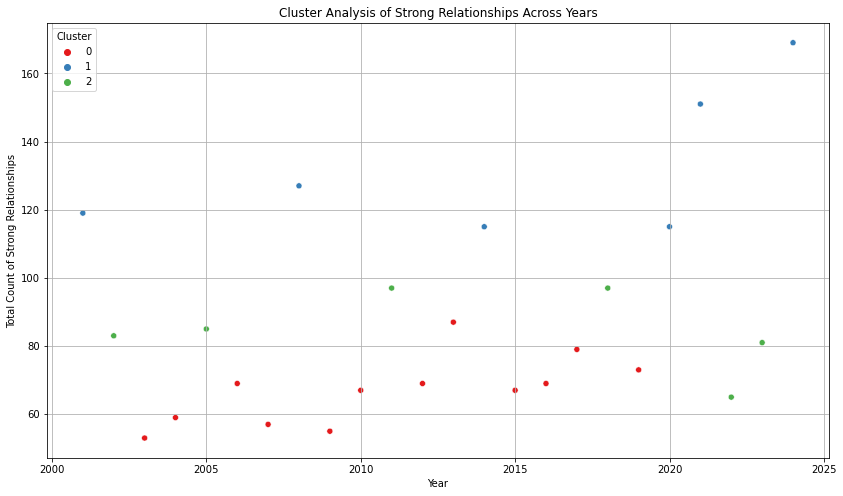

Cluster 1: Years [2001, 2008, 2014, 2020, 2021, 2024]
Cluster 2: Years [2002, 2005, 2011, 2018, 2022, 2023]
Cluster 0: Years [2003, 2004, 2006, 2007, 2009, 2010, 2012, 2013, 2015, 2016, 2017, 2019]


In [145]:


# Creating "Total_Strong_Count" column
relationship_df['Total_Strong_Count'] = relationship_df['Positive_Count'] + relationship_df['Negative_Count']

plt.figure(figsize=(14, 8))
sns.scatterplot(data=relationship_df, x='Year', y='Total_Strong_Count', hue='Cluster', palette='Set1')
plt.title('Cluster Analysis of Strong Relationships Across Years')
plt.xlabel('Year')
plt.ylabel('Total Count of Strong Relationships')
plt.grid(True)
plt.show()

for cluster in relationship_df['Cluster'].unique():
    years_in_cluster = relationship_df[relationship_df['Cluster'] == cluster]['Year'].tolist()
    print(f"Cluster {cluster}: Years {years_in_cluster}")



In [146]:
## This dataframe includes the yearly correlation betweeen all sectors, unemployment, and jolts overall. 
# It also includes the average correlation which is created by averaging all the sector relationships for the year. 
# The std correlation is calculated as the standard deviation of the correlation values for each year. 
# Step 1: Prepare the data for clustering analysis by year
# Aggregated features for clustering
yearly_correlation_features = correlation_by_year_df.pivot_table(
    index='Year',
    columns=['Sector_1', 'Sector_2'],
    values='Correlation',
    aggfunc='mean').fillna(0)  # Fill NaN with 0 for missing correlations

# Example: Using average correlation and standard deviation as features
yearly_stats = correlation_by_year_df.groupby('Year').agg(
    avg_correlation=('Correlation', 'mean'),
    std_correlation=('Correlation', 'std')).fillna(0)

# Merge additional features if needed
yearly_correlation_features = pd.merge(yearly_correlation_features, yearly_stats, on='Year')
yearly_correlation_features

C:\Users\alvar\AppData\Local\Temp\ipykernel_8316\3964016924.py:18: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  yearly_correlation_features = pd.merge(yearly_correlation_features, yearly_stats, on='Year')


(JOLTSDurableGoodsManuf, JOLTSDurableGoodsManuf)  \
Year                                                     
2001                                               1.0   
2002                                               1.0   
2003                                               1.0   
2004                                               1.0   
2005                                               1.0   
2006                                               1.0   
2007                                               1.0   
2008                                               1.0   
2009                                               1.0   
2010                                               1.0   
2011                                               1.0   
2012                                               1.0   
2013                                               1.0   
2014                                               1.0   
2015                                               1.0   
2016                                               1.0   
2017                                               1.0   
2018                                               1.0   
2019                                               1.0   
2020                                               1.0   
2021                                               1.0   
2022                                               1.0   
2023                                               1.0   
2024                                               1.0   

      (JOLTSDurableGoodsManuf, JOLTSFinanceANDInsurance)  \
Year                                                       
2001                                           0.877857    
2002                                          -0.426468    
2003                                           0.028760    
2004                                          -0.163745    
2005                                           0.903598    
2006                                           0.865120    
2007                                           0.767962    
2008                                           0.521027    
2009                                          -0.472970    
2010                                           0.940879    
2011                                          -0.967930    
2012                                          -0.776404    
2013                                          -0.801455    
2014                                           0.881581    
2015                                          -0.989672    
2016                                           0.813757    
2017                                          -0.347851    
2018                                          -0.154779    
2019                                          -0.662123    
2020                                           0.004606    
2021                                           0.682086    
2022                                           0.084713    
2023                                          -0.440740    
2024                                           1.000000    

      (JOLTSDurableGoodsManuf, JOLTSHealthCareSocialAssistance)  \
Year                                                              
2001                                           0.683155           
2002                                           0.470939           
2003                                          -0.390537           
2004                                          -0.182460           
2005                                           0.657983           
2006                                          -0.258877           
2007                                           0.199484           
2008                                           0.902948           
2009                                           0.234244           
2010                                           0.072852           
2011                                           0.859425           
2012                                           0.450927          

In [147]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(yearly_correlation_features)

yearly_correlation_features['Cluster'] = clusters
yearly_correlation_features.reset_index(inplace=True)

c:\Users\alvar\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


**Cluster Analysis Part 2:**
1. I then decided to redo the clusters with the dataframe (correlation_by_year_df) that included all of the sector relationship strength with each other. 
2. This was used to understand how the segmentation changes if more features are created. 

After creating more features such as ave correlation across sectors for each year, and std deviation of all values, the clusters changed slightly with more years grouped together and 2024 seprated. Perhaps 2024 was separated because the data for the year is incompleted.
>
Cluster 0: Years [2001, 2005, 2008, 2009, 2011, 2014, 2017, 2018, 2020, 2021, 2023]
>
Cluster 1: Years [2002, 2003, 2004, 2006, 2007, 2010, 2012, 2013, 2015, 2016, 2019, 2022]
>
Cluster 2: Years [2024]

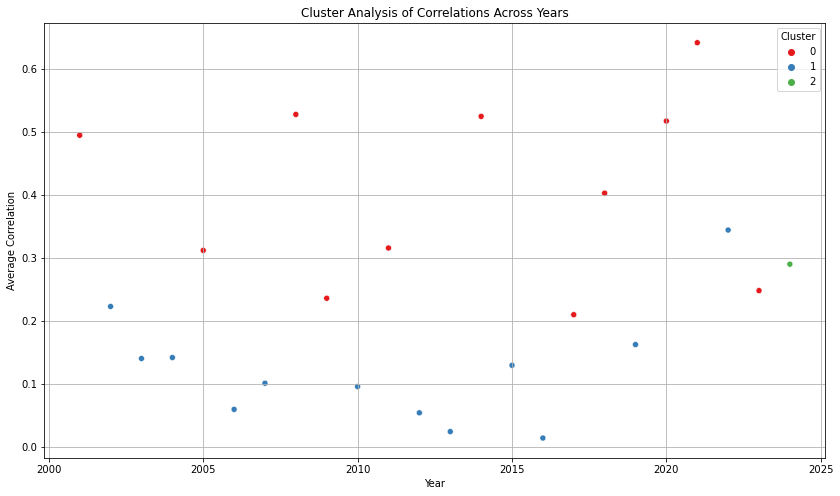

Cluster 0: Years [2001, 2005, 2008, 2009, 2011, 2014, 2017, 2018, 2020, 2021, 2023]
Cluster 1: Years [2002, 2003, 2004, 2006, 2007, 2010, 2012, 2013, 2015, 2016, 2019, 2022]
Cluster 2: Years [2024]


In [148]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=yearly_correlation_features, x='Year', y='avg_correlation', hue='Cluster', palette='Set1')
plt.title('Cluster Analysis of Correlations Across Years')
plt.xlabel('Year')
plt.ylabel('Average Correlation')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

for cluster in yearly_correlation_features['Cluster'].unique():
    years_in_cluster = yearly_correlation_features[yearly_correlation_features['Cluster'] == cluster]['Year'].tolist()
    print(f"Cluster {cluster}: Years {years_in_cluster}")